In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd

# MODEL 1 we treat the usage of clean energy as a "state", which means it is not a time series. It is actually determined by these factors:
# 1.population
# 2.the industrial structure
# 3.Year
# 4.Annual CO2 per GDP
# 5.Country Name
# So firstly let us use the RANDOM FOREST REGRESSIOR to build a model to find the link between these factors and the Renewables energy  percentage in the overall energy comsumption

In [50]:
useful=['Entity','Year', 'Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'indu_rate',
       'Renewables - % electricity']
feature=['Year', 'Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'indu_rate']
data=pd.read_csv("/Users/catillzhang/Downloads/all_we_need.csv")
data=pd.DataFrame(data[useful])
country_name=pd.DataFrame(data['Entity'])
Encoder=OneHotEncoder(sparse=False)
encoded_data=Encoder.fit_transform(country_name)
encoded_df=pd.DataFrame(encoded_data,columns=Encoder.get_feature_names_out())
data_feature=data[feature]
data_feature=pd.concat([data_feature,encoded_df],axis=1)
data_label=data['Renewables - % electricity']
X=data_feature
y=data_label
data_feature

/Users/catillzhang/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Year  Population  Annual CO₂ emissions per GDP (kg per international-$)  \
0    1991    28015762                                           0.548606       
1    1992    28347644                                           0.558962       
2    1993    28668168                                           0.543595       
3    1994    28981190                                           0.534928       
4    1995    29289430                                           0.533380       
..    ...         ...                                                ...       
184  2013  2319034279                                           0.241167       
185  2014  2339254235                                           0.228171       
186  2015  2358856257                                           0.219603       
187  2016  2378571328                                           0.217775       
188  2017  2397995780                                           0.215103       

     indu_rate  Entity_Canada  Entity_EU  Entity_India  Entity_Japan  \
0    22.577000            1.0        0.0           0.0           0.0   
1    21.900000            1.0        0.0           0.0           0.0   
2    21.500000            1.0        0.0           0.0           0.0   
3    21.778000            1.0        0.0           0.0           0.0   
4    21.966000            1.0        0.0           0.0           0.0   
..         ...            ...        ...           ...           ...   
184  28.005037            0.0        1.0           0.0           0.0   
185  27.742000            0.0        1.0           0.0           0.0   
186  27.780481            0.0        1.0           0.0           0.0   
187  27.425852            0.0        1.0           0.0           0.0   
188  27.234148            0.0        1.0           0.0           0.0   

     Entity_South Korea  Entity_United Kingdom  Entity_United States  
0                   0.0                    0.0                   0.0  
1                   0.0                    0.0                   0.0  
2                   0.0                    0.0                   0.0  
3                   0.0                    0.0                   0.0  
4                   0.0                    0.0                   0.0  
..                  ...                    ...                   ...  
184                 0.0                    0.0                   0.0  
185                 0.0                    0.0                   0.0  
186                 0.0                    0.0                   0.0  
187                 0.0                    0.0                   0.0  
188                 0.0                    0.0                   0.0  

[189 rows x 11 columns]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
random_regressior=RandomForestRegressor(n_estimators=200,random_state=42)

In [29]:
random_regressior.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# now let us test the performance of our model

The R^2 for this model is 0.9991930117436595
The MSE for this model is 0.2900396286322895


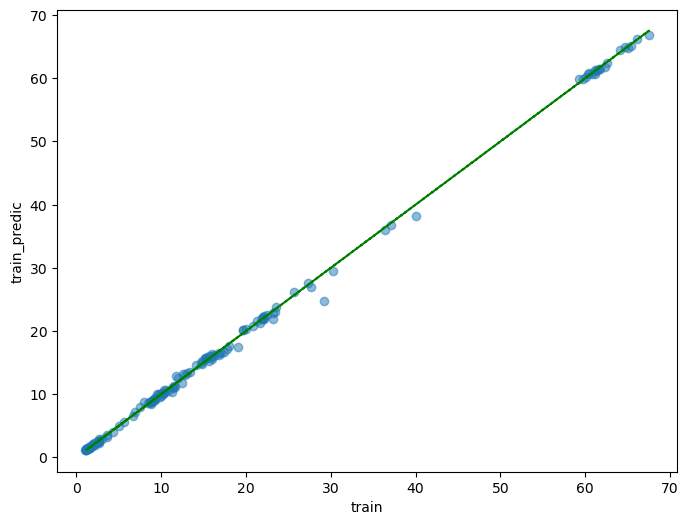

In [30]:
import matplotlib.pyplot as plt
y_train_predic=random_regressior.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_predic, alpha=0.5)
plt.xlabel('train')
plt.ylabel('train_predic')
plt.plot(y_train,y_train,"g--")
print("The R^2 for this model is",random_regressior.score(X_train,y_train))
print("The MSE for this model is",mean_squared_error(y_train_predic,y_train))


The R^2 for this model is 0.9970826721394718
The MSE for this model is 1.2519906278080029


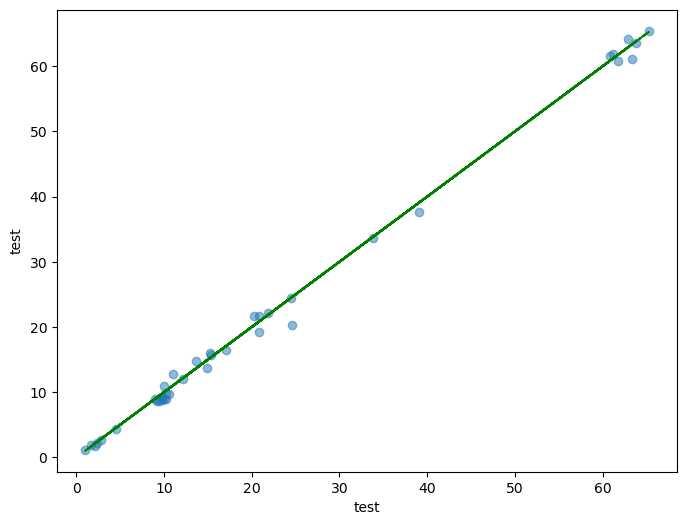

In [32]:
import matplotlib.pyplot as plt
y_test_predic=random_regressior.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predic, alpha=0.5)
plt.xlabel('test')
plt.ylabel('test')
plt.plot(y_test,y_test,"g--")
print("The R^2 for this model is",random_regressior.score(X_test,y_test))
print("The MSE for this model is",mean_squared_error(y_test_predic,y_test))

# as long as we have set the model , we will try to predic what will happen in the future utill 2050
# However, as this is a multi-variable prediction,we only know years, we have to build the model for other factors first, then predic the desired one

The R^2 for this model is 0.9999780680228318
The MSE for this model is 12306732849234.168


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


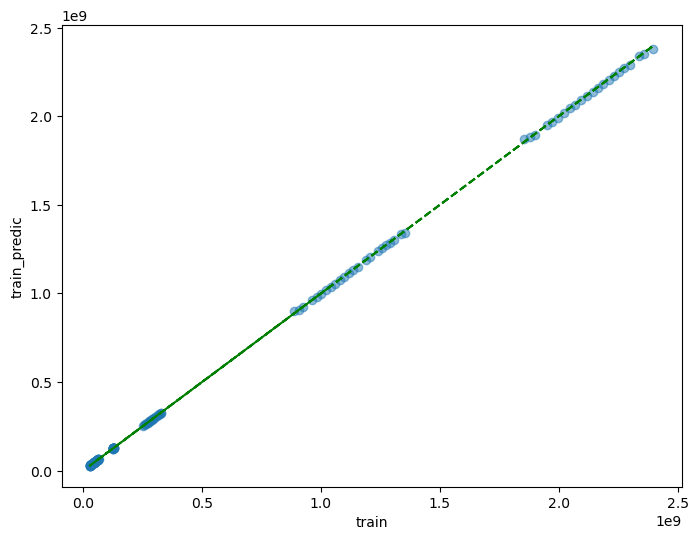

In [296]:
popu=data[['Year',"Population"]]
country_name=pd.DataFrame(data['Entity'])
Encoder=OneHotEncoder(sparse=False)
encoded_data=Encoder.fit_transform(country_name)
encoded_df=pd.DataFrame(encoded_data,columns=Encoder.get_feature_names_out())
popu=pd.concat([encoded_df,popu],axis=1)
popu_feature=popu.drop("Population",axis=1)
popu_label=data['Population']
X=popu_feature
y=popu_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_4_popu=RandomForestRegressor(n_estimators=200,random_state=42)
model_4_popu.fit(X_train,y_train)
y_train_predic=model_4_popu.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_predic, alpha=0.5)
plt.xlabel('train')
plt.ylabel('train_predic')
plt.plot(y_train,y_train,"g--")
print("The R^2 for this model is",model_4_popu.score(X_train,y_train))
print("The MSE for this model is",mean_squared_error(y_train_predic,y_train))


The R^2 for this model is 0.9995973020509329
The MSE for this model is 197240637602159.72


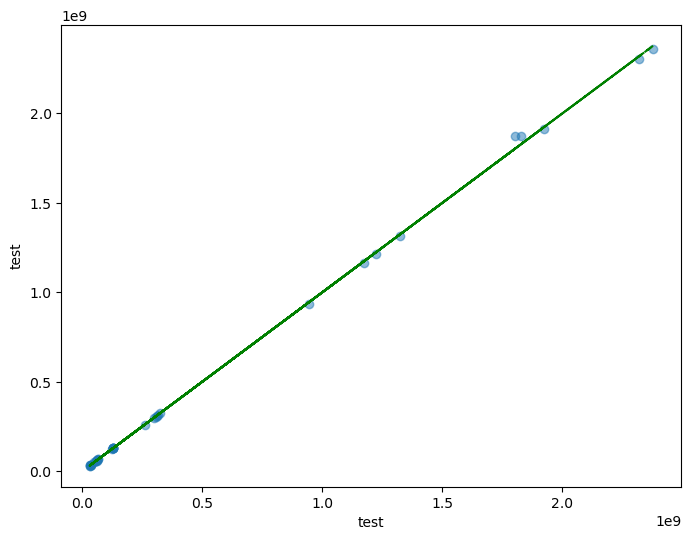

In [297]:
import matplotlib.pyplot as plt
y_test_predic=model_4_popu.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predic, alpha=0.5)
plt.xlabel('test')
plt.ylabel('test')
plt.plot(y_test,y_test,"g--")
print("The R^2 for this model is",model_4_popu.score(X_test,y_test))
print("The MSE for this model is",mean_squared_error(y_test_predic,y_test))

The R^2 for this model is 0.9984070052178781
The MSE for this model is 0.048823001402040066


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


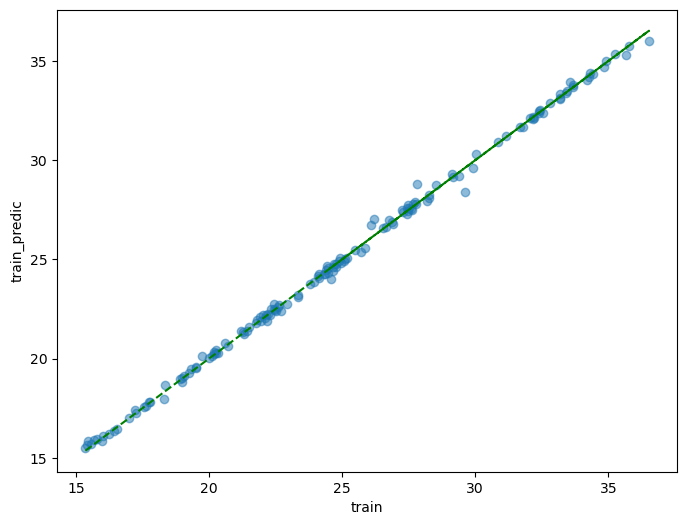

In [298]:

indu=data[['Year',"indu_rate"]]
country_name=pd.DataFrame(data['Entity'])
Encoder=OneHotEncoder(sparse=False)
encoded_data=Encoder.fit_transform(country_name)
encoded_df=pd.DataFrame(encoded_data,columns=Encoder.get_feature_names_out())
indu=pd.concat([encoded_df,indu],axis=1)
indu_feature=indu.drop("indu_rate",axis=1)
indu_label=data['indu_rate']
X=indu_feature
y=indu_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_4_indu=RandomForestRegressor(n_estimators=200,random_state=42)
model_4_indu.fit(X_train,y_train)
y_train_predic=model_4_indu.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_predic, alpha=0.5)
plt.xlabel('train')
plt.ylabel('train_predic')
plt.plot(y_train,y_train,"g--")
print("The R^2 for this model is",model_4_indu.score(X_train,y_train))
print("The MSE for this model is",mean_squared_error(y_train_predic,y_train))


The R^2 for this model is 0.9872802742568197
The MSE for this model is 0.4259635149522034


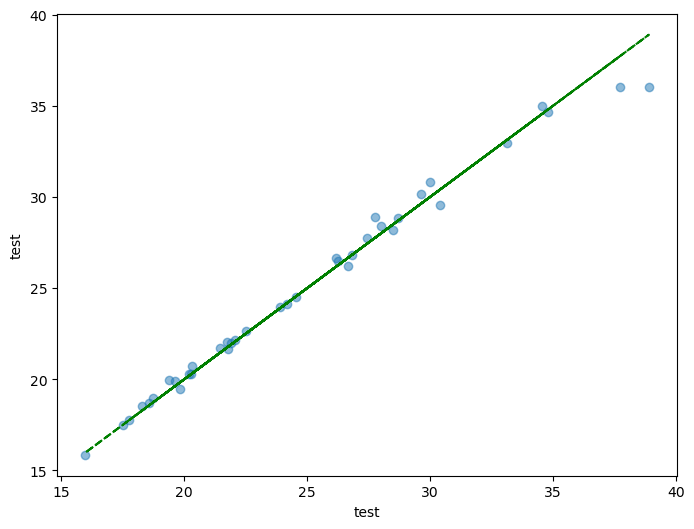

In [299]:
import matplotlib.pyplot as plt
y_test_predic=model_4_indu.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predic, alpha=0.5)
plt.xlabel('test')
plt.ylabel('test')
plt.plot(y_test,y_test,"g--")
print("The R^2 for this model is",model_4_indu.score(X_test,y_test))
print("The MSE for this model is",mean_squared_error(y_test_predic,y_test))

In [304]:
countries_to_study = [
     "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada","EU"
]

In [106]:
    data_to_encode=pd.DataFrame([["India"]]*25,columns=["Entity"])
    data_for_year=pd.DataFrame([[j]for j in range(2025,2050)],columns=["Year"])
    encoded_data=Encoder.transform(data_to_encode)
    data_country_encoded=pd.DataFrame(encoded_data,columns=Encoder.get_feature_names_out())
    data_feature_future=pd.concat([data_country_encoded,data_for_year],axis=1)
    data_for_indu_future=pd.DataFrame(model_4_indu.predict(data_feature_future),columns=["indu_rate"])
    data_for_popu_future=pd.DataFrame(model_4_popu.predict(data_feature_future),columns=["Population"])
    data_for_final=pd.concat([data_for_year,data_for_popu_future,data_for_indu_future,data_country_encoded],axis=1)
    data_of_final=random_regressior.predict(data_for_final)
    data_of_final

array([15.93154075, 15.93154075, 15.93154075, 15.93154075, 15.93154075,
       15.93154075, 15.93154075, 15.93154075, 15.93154075, 15.93154075,
       15.93154075, 15.93154075, 15.93154075, 15.93154075, 15.93154075,
       15.93154075, 15.93154075, 15.93154075, 15.93154075, 15.93154075,
       15.93154075, 15.93154075, 15.93154075, 15.93154075, 15.93154075])

# So we failed...the model seems to be overfiting? but it perform quite well on the test data....
# After searching for more materials, we found that we WRONGLY DEFINE THE PROBLEM TYPE
# This is a Time-Series Prolems, which means those data points are not INDEPENDENT
# Although the initial problem was a time series, the prediction effect turned out to be almost like a regression problem since I still provided other features. However, the problem arose when I attempted to perform regression on the features needed for the final prediction result, which are not available in the future. Because the value we actually need to predict is not truly a time series; it is determined by other factors, which are time series.
# And as ling as we use the predic feature, which are badly predict, the model seems to be crashed..
# Now let us apply specific time-series tool for this problem

In [107]:
! pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c4/ef/c7a0349eec94535d37498a06c033dab2793fdfd7751d461ea3a47f4d23af/prophet-1.1.5-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/91/7a/2c5c043e4a7cff3dbab6b0f3a79b492e76c7dc1a06f309897509c9d467f5/holidays-0.44-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/18/4f/726c9cd8ca3327af96a8f808df3ac3327bf1452d68b06f96e1e3717f4b15/importlib_resources-6.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f9

In [33]:
data

Entity  Year  Population  \
0    Canada  1991    28015762   
1    Canada  1992    28347644   
2    Canada  1993    28668168   
3    Canada  1994    28981190   
4    Canada  1995    29289430   
..      ...   ...         ...   
184      EU  2013  2319034279   
185      EU  2014  2339254235   
186      EU  2015  2358856257   
187      EU  2016  2378571328   
188      EU  2017  2397995780   

     Annual CO₂ emissions per GDP (kg per international-$)  indu_rate  \
0                                             0.548606      22.577000   
1                                             0.558962      21.900000   
2                                             0.543595      21.500000   
3                                             0.534928      21.778000   
4                                             0.533380      21.966000   
..                                                 ...            ...   
184                                           0.241167      28.005037   
185                                           0.228171      27.742000   
186                                           0.219603      27.780481   
187                                           0.217775      27.425852   
188                                           0.215103      27.234148   

     Renewables - % electricity  
0                     61.393510  
1                     61.643684  
2                     61.688430  
3                     60.328484  
4                     61.172176  
..                          ...  
184                   33.830066  
185                   36.361344  
186                   37.083920  
187                   39.064648  
188                   40.051834  

[189 rows x 6 columns]

11:55:00 - cmdstanpy - INFO - Chain [1] start processing
11:55:00 - cmdstanpy - INFO - Chain [1] done processing
11:55:00 - cmdstanpy - INFO - Chain [1] start processing
11:55:00 - cmdstanpy - INFO - Chain [1] done processing
11:55:00 - cmdstanpy - INFO - Chain [1] start processing
11:55:00 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:01 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:01 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:02 - cmdstanpy - INFO - Chain [1] done processing
11:55:02 - cmdstanpy - INFO - Chain [1] start processing
11:55:02 - cmdstanpy - INFO - Chain [1] done processing
11:55:02 - cmdstanpy - INFO - Chain [1] start processing
11:55:03 - cmdstanpy - INFO - Chain [1] done processing
11:55:03 - cmdstanpy - INFO - Chain [1] start processing
11:55:03 - cmdstanpy - INFO - Chain [1]

Entity    Year    Population  indu_rate  \
0    Canada  1991.0  2.801692e+07  21.981981   
1    Canada  1992.0  2.834399e+07  21.985537   
2    Canada  1993.0  2.867294e+07  21.879077   
3    Canada  1994.0  2.897873e+07  22.098869   
4    Canada  1995.0  2.928938e+07  22.210616   
..      ...     ...           ...        ...   
415      EU  2046.0  2.988869e+09  14.125226   
416      EU  2047.0  3.016004e+09  13.860916   
417      EU  2048.0  3.047225e+09  13.618415   
418      EU  2049.0  3.045592e+09  12.609690   
419      EU  2050.0  3.069535e+09  12.322810   

     Annual CO₂ emissions per GDP (kg per international-$)  
0                                         2.801692e+07      
1                                         2.834399e+07      
2                                         2.867294e+07      
3                                         2.897873e+07      
4                                         2.928938e+07      
..                                                 ...      
415                                       2.988869e+09      
416                                       3.016004e+09      
417                                       3.047225e+09      
418                                       3.045592e+09      
419                                       3.069535e+09      

[420 rows x 5 columns]

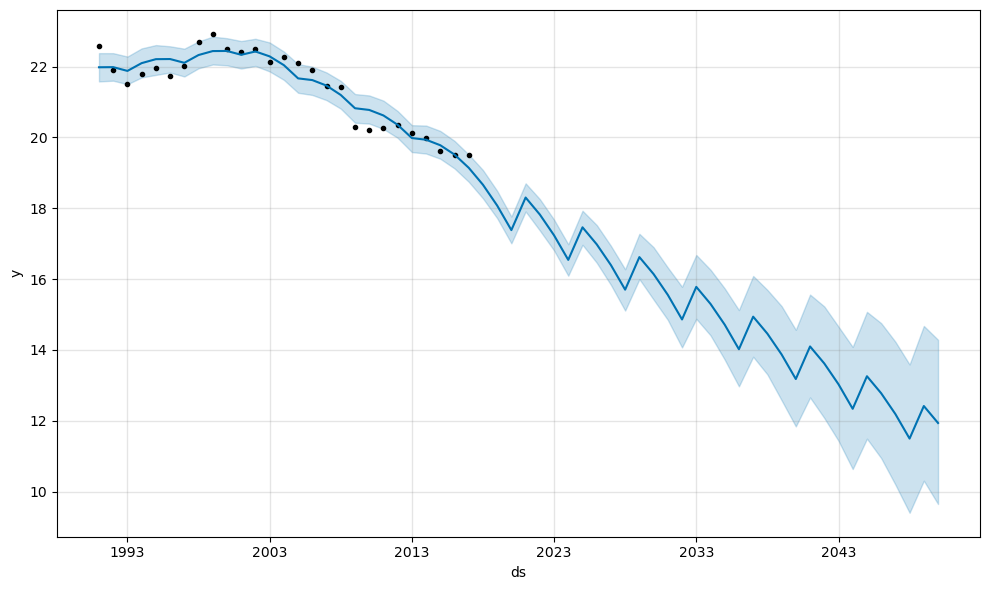

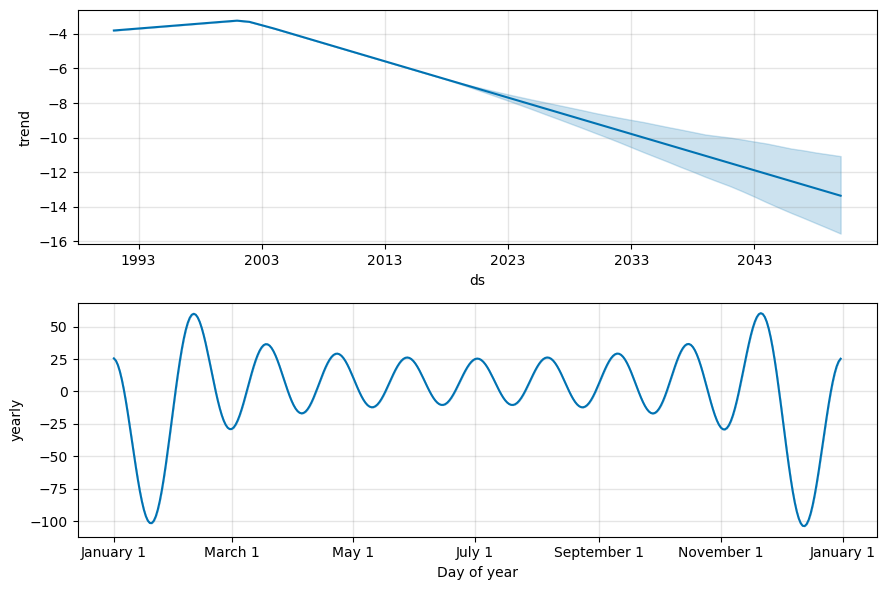

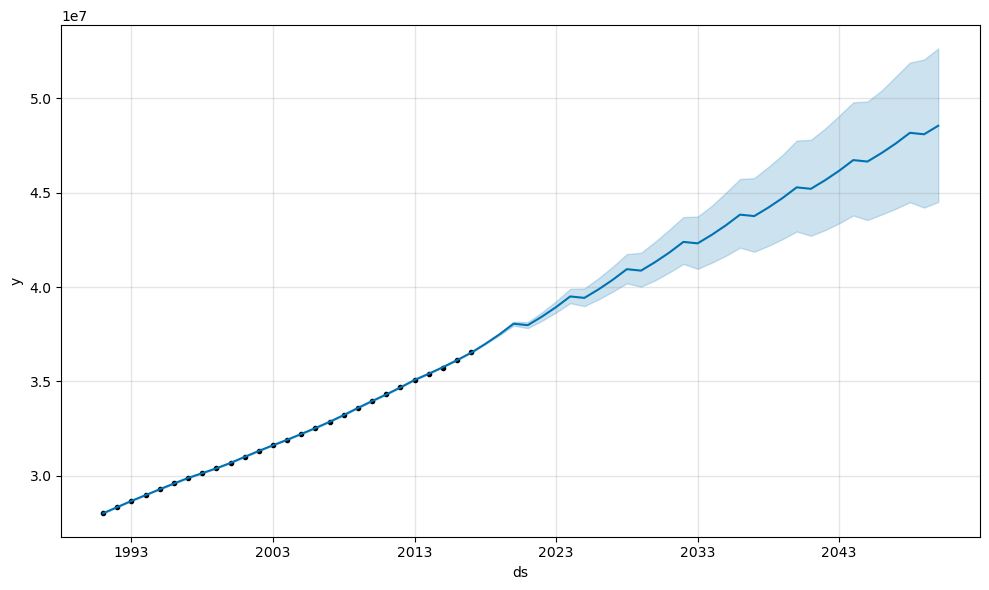

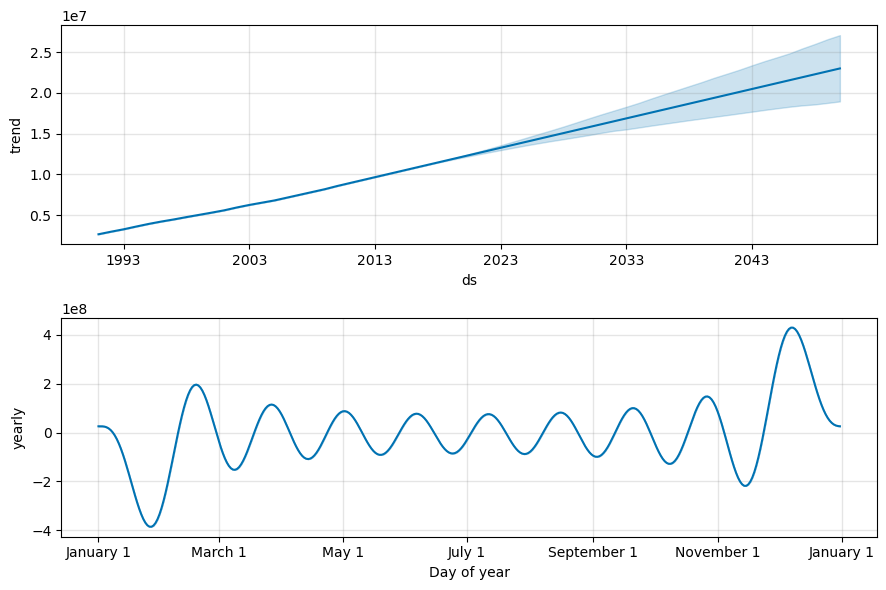

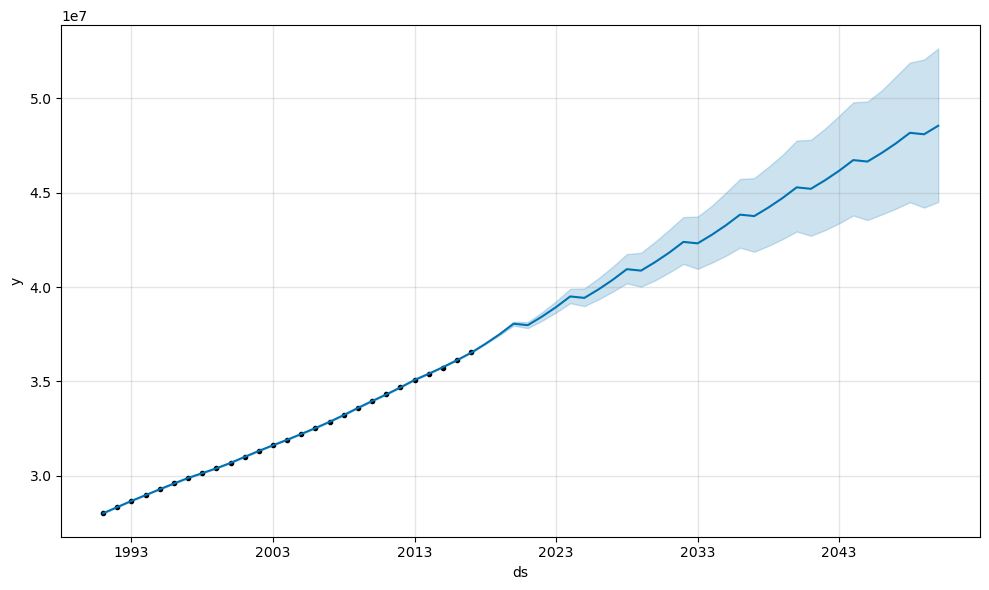

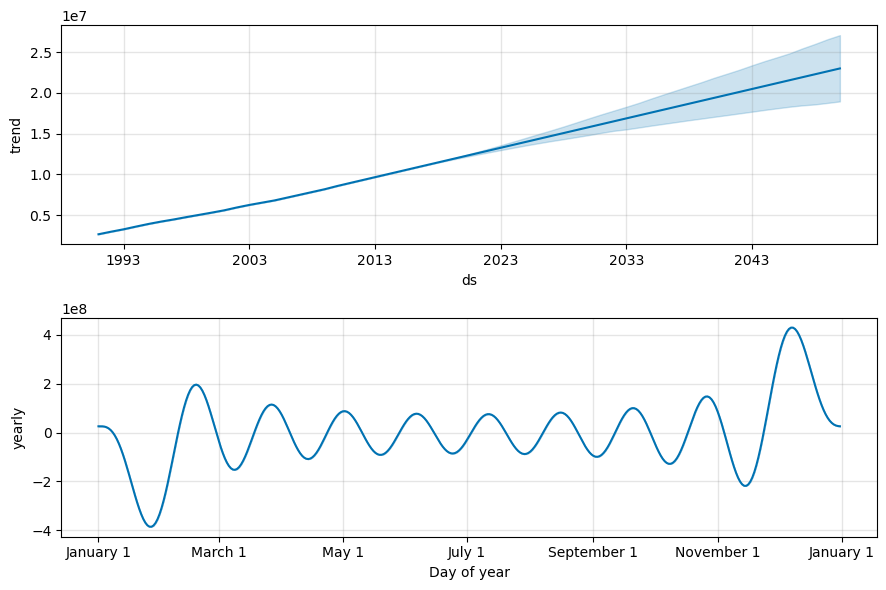

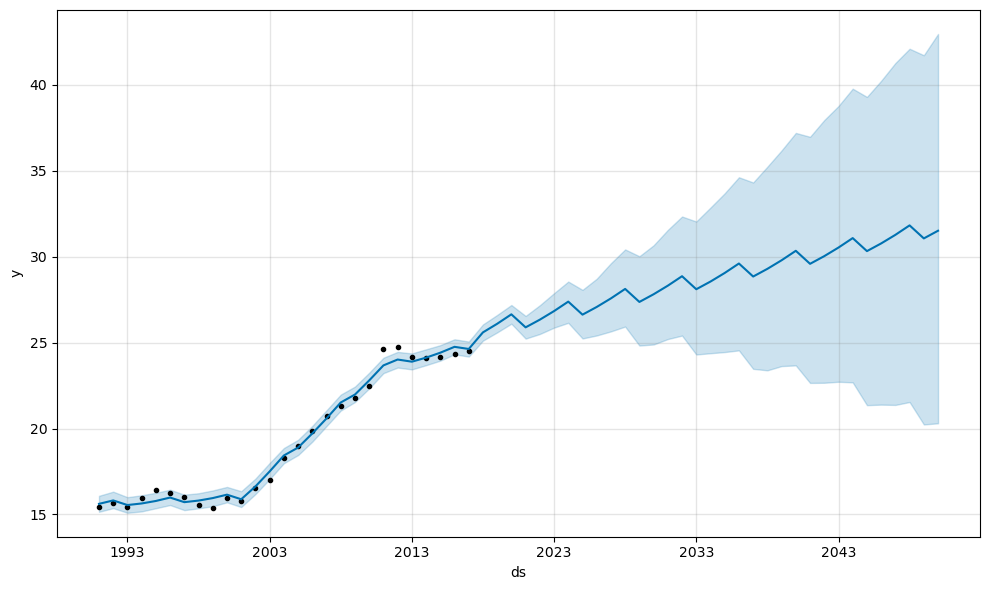

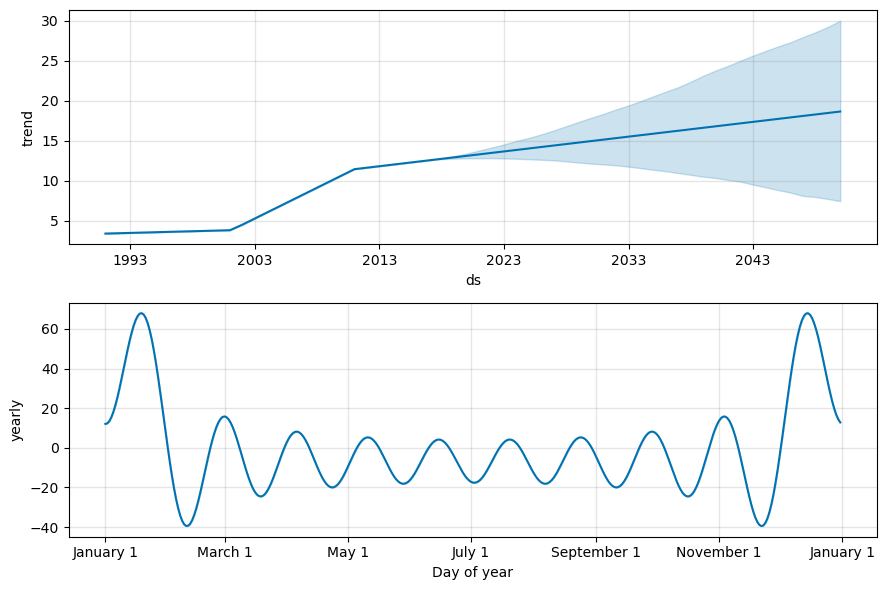

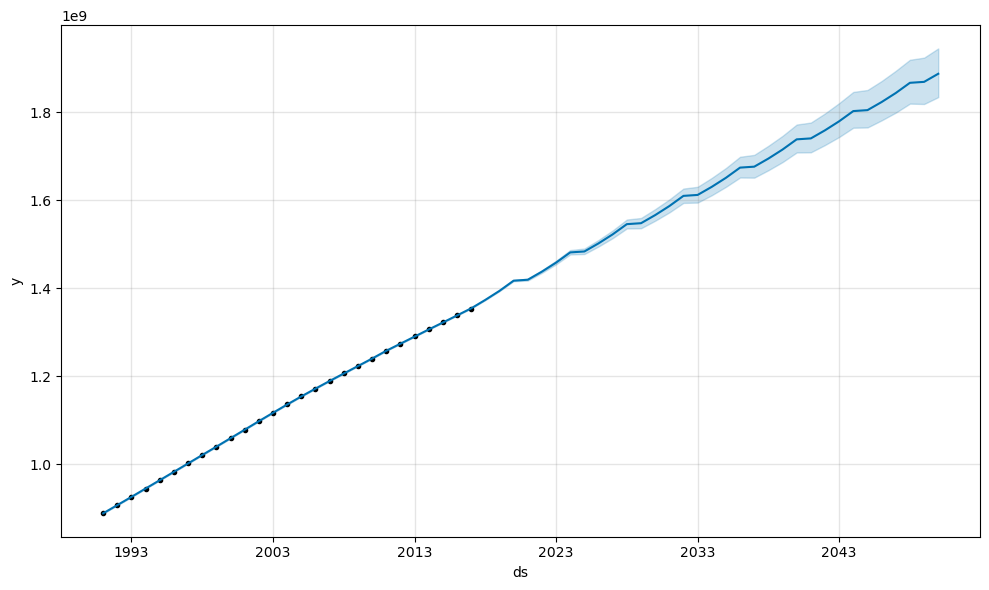

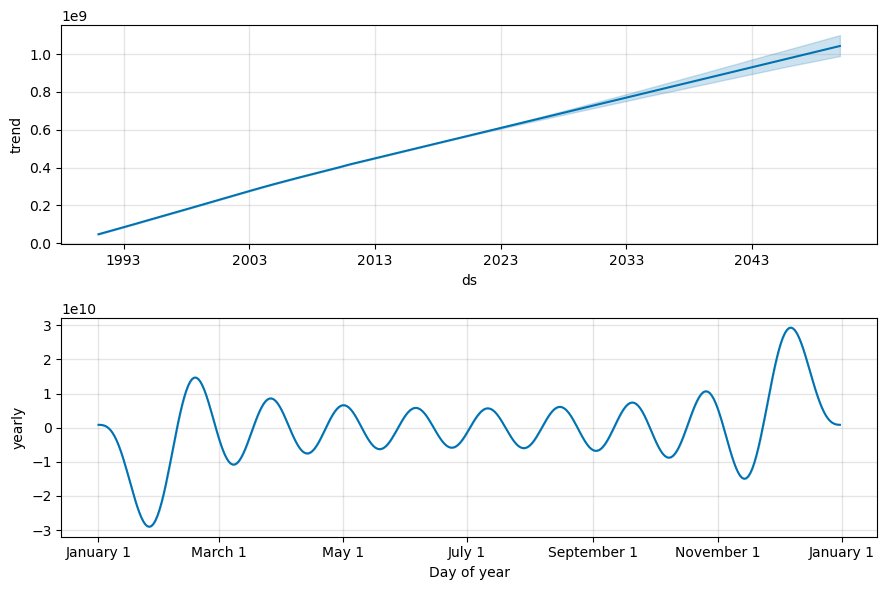

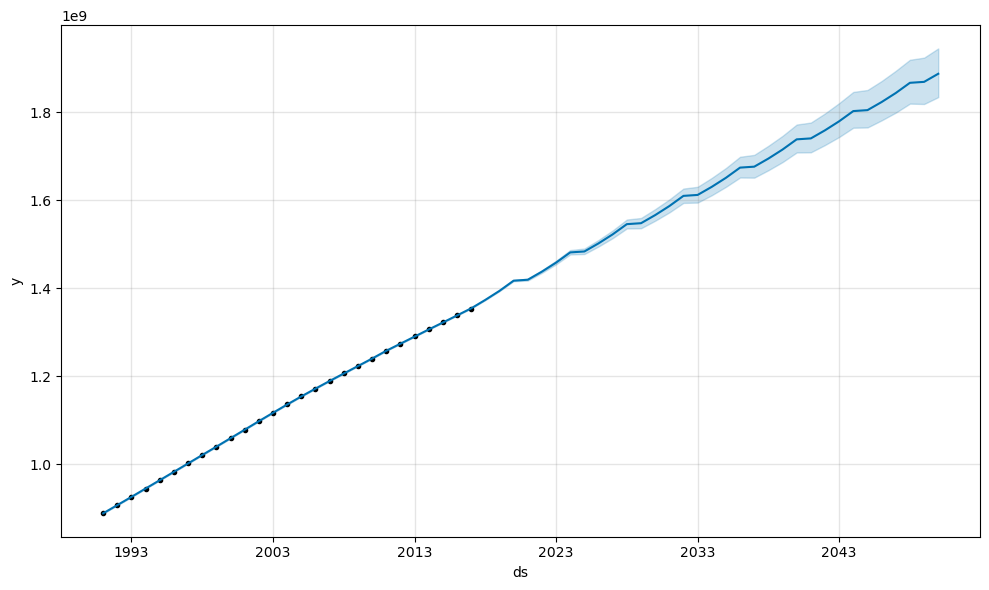

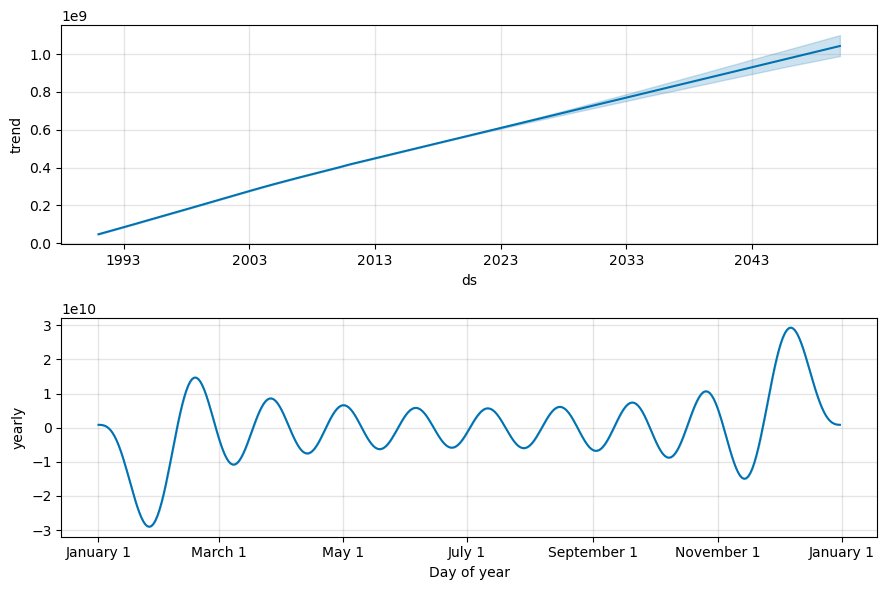

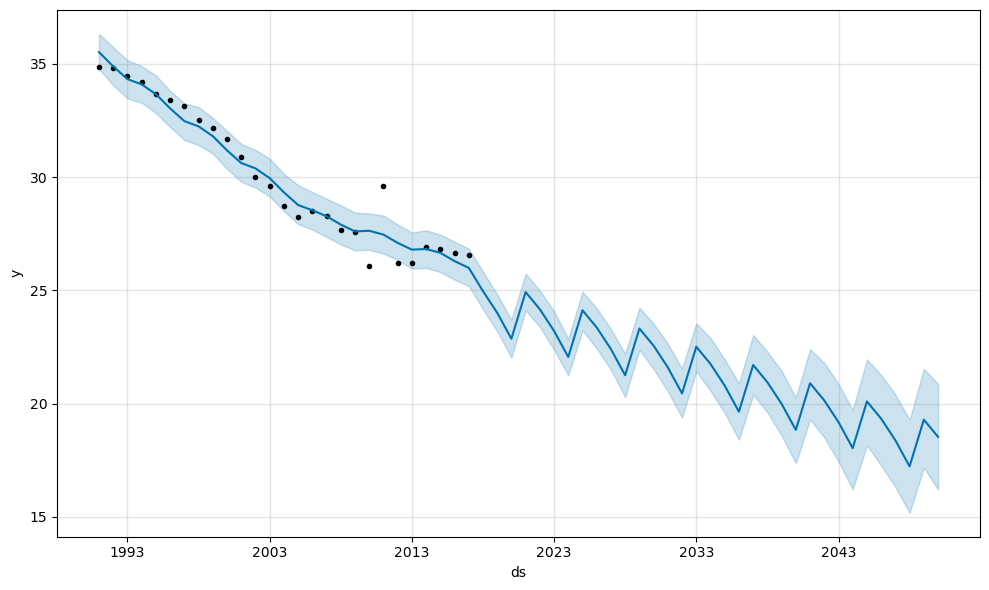

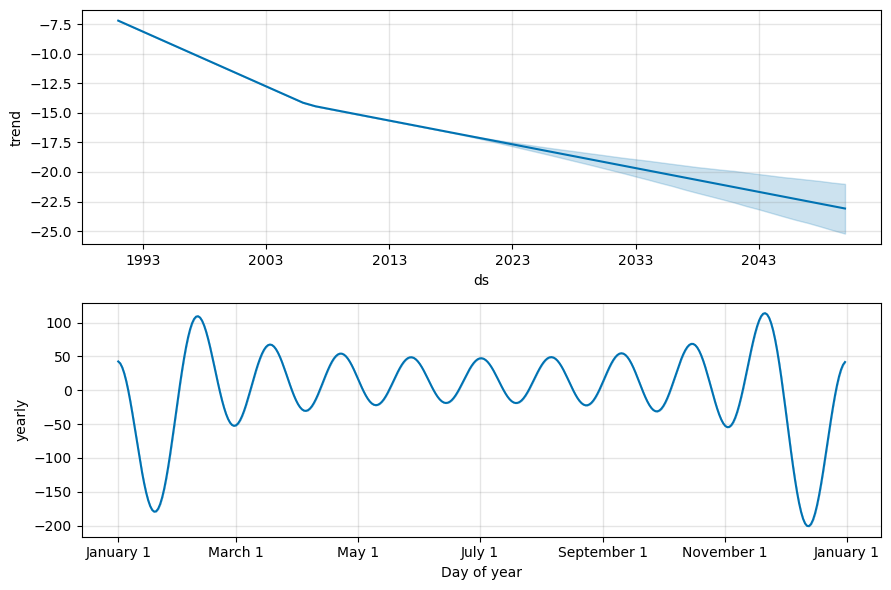

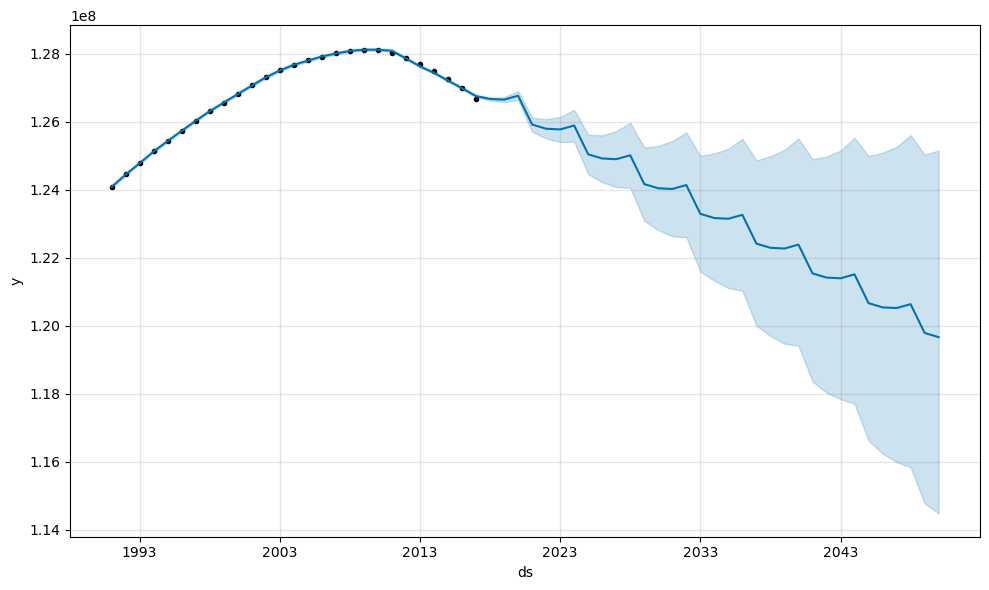

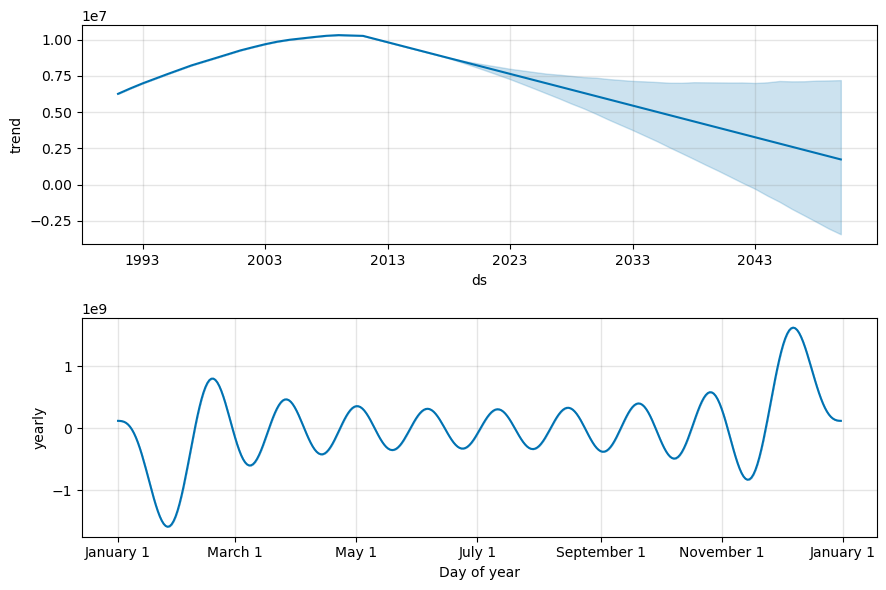

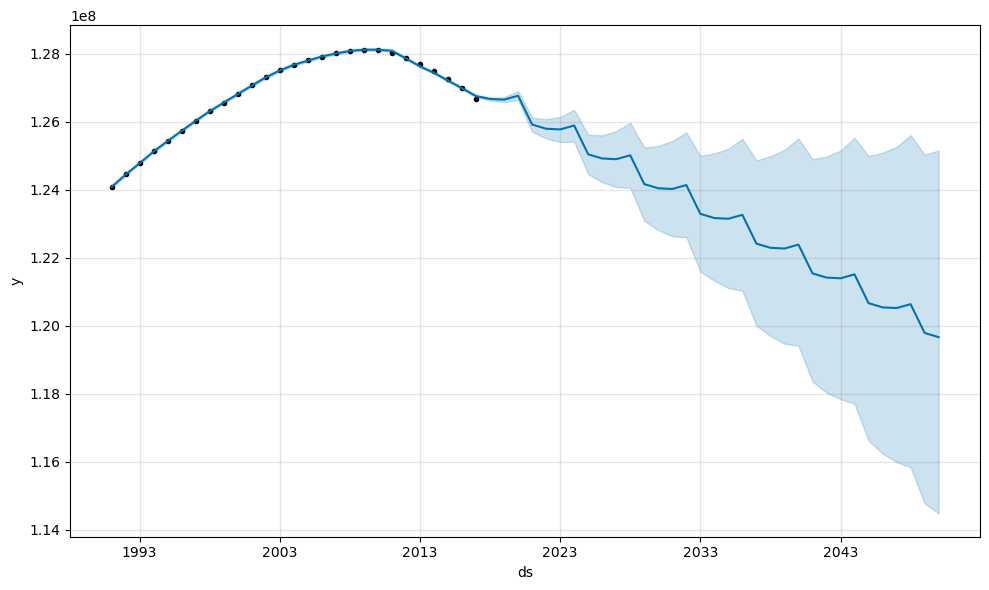

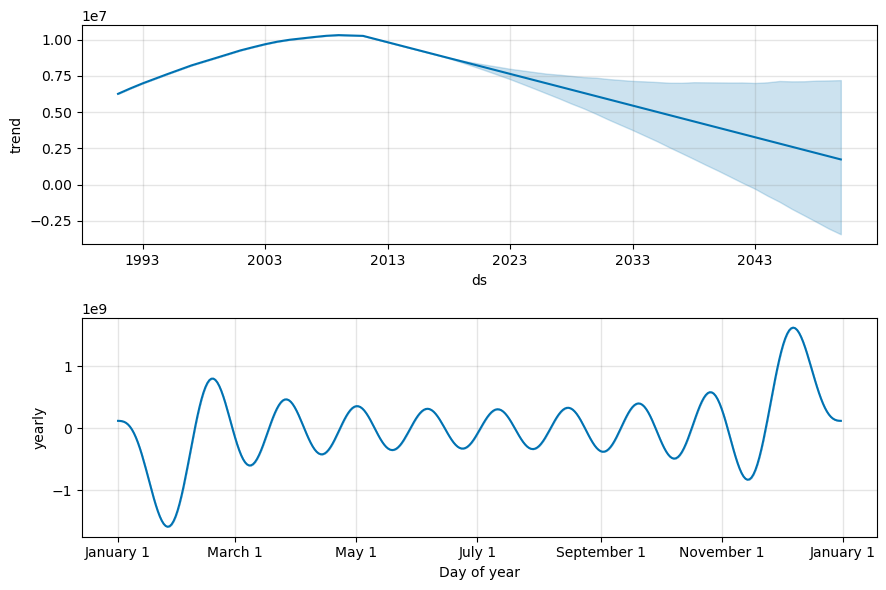

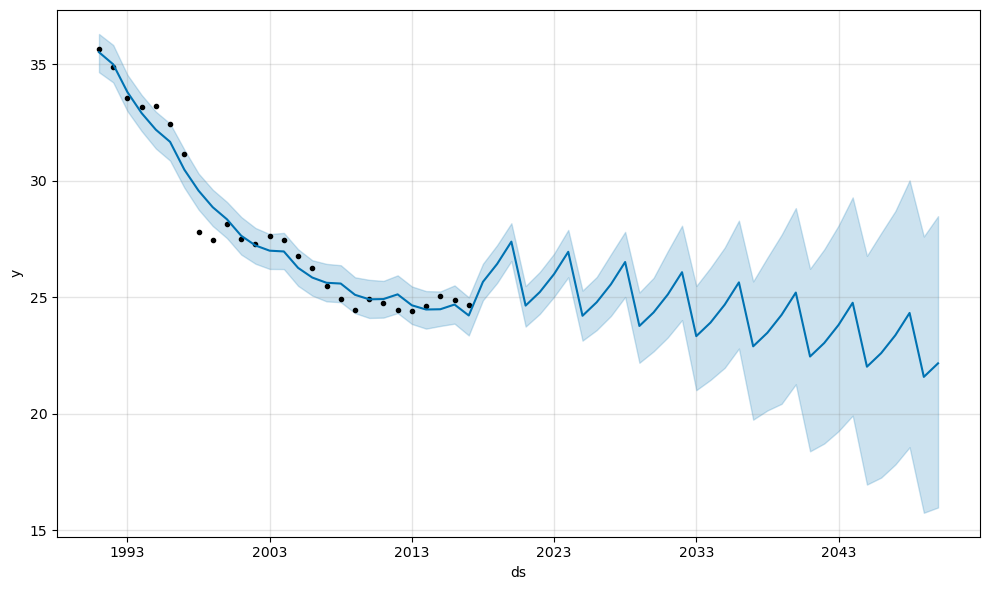

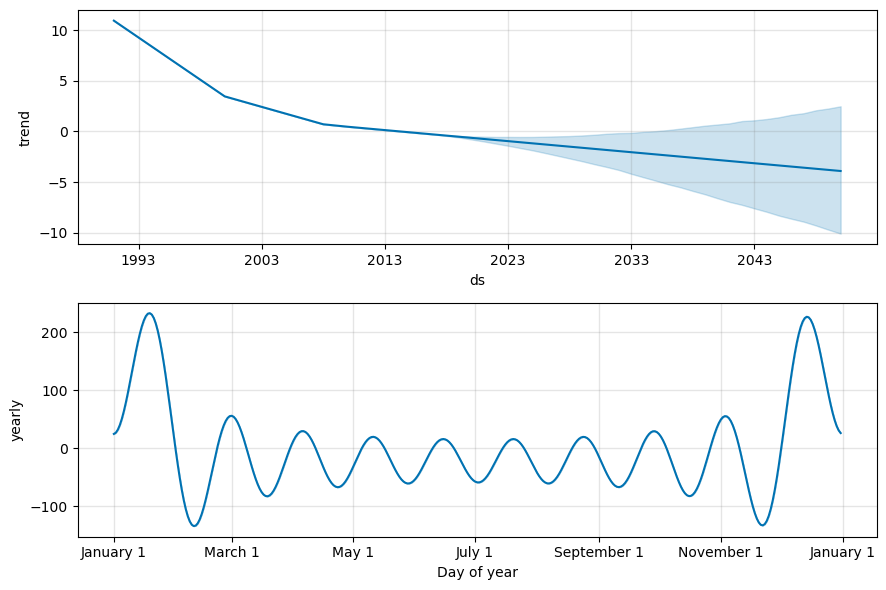

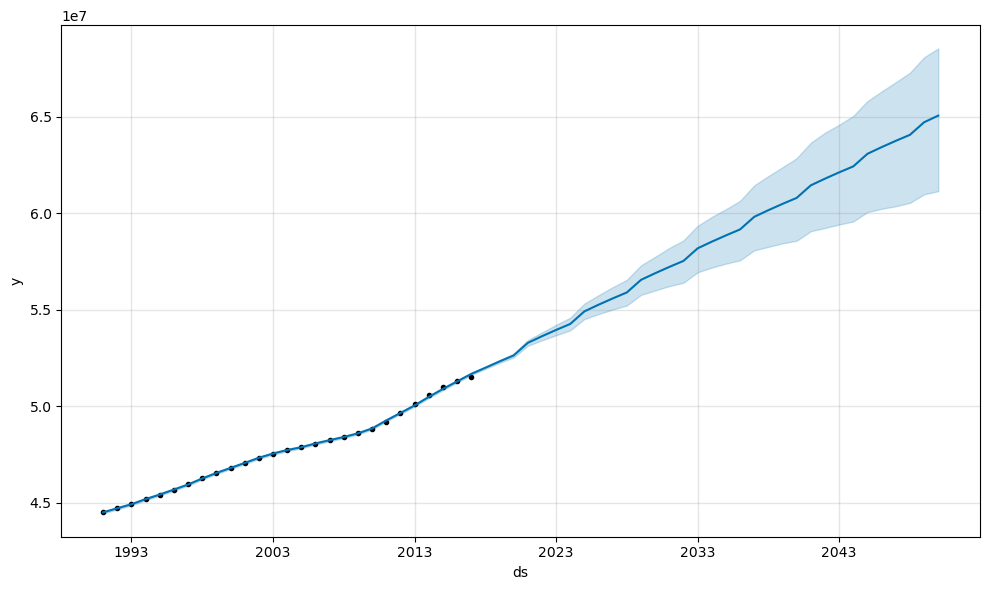

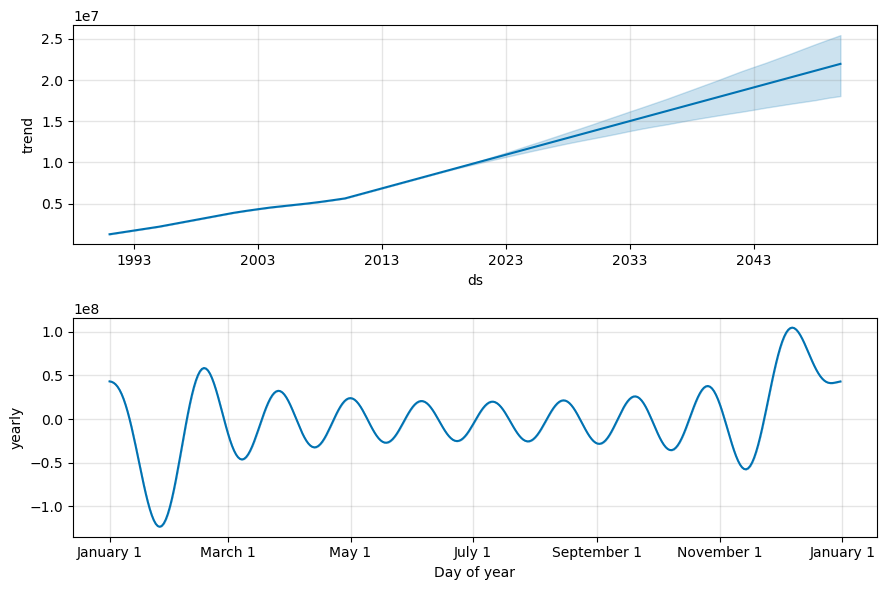

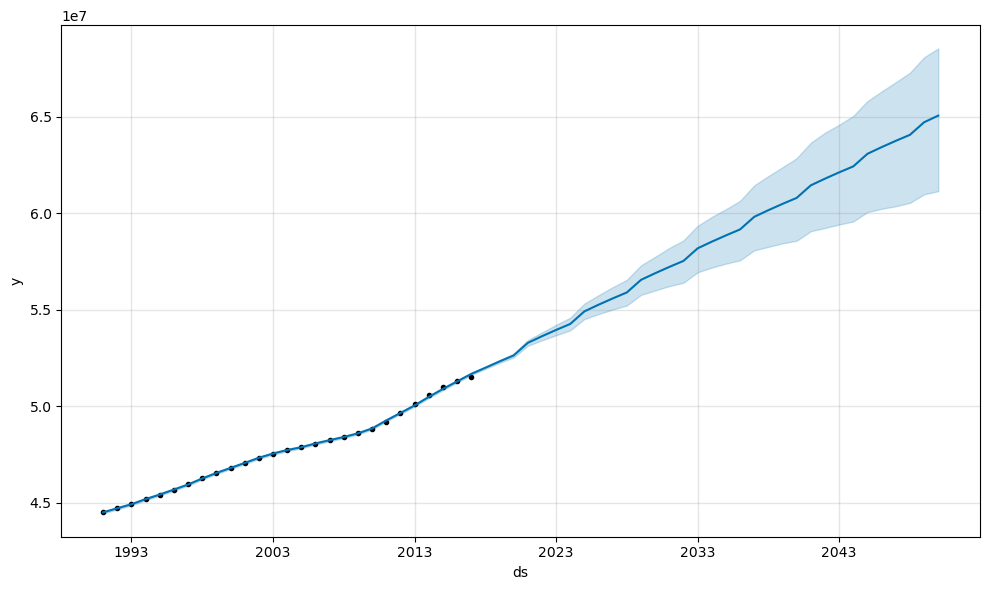

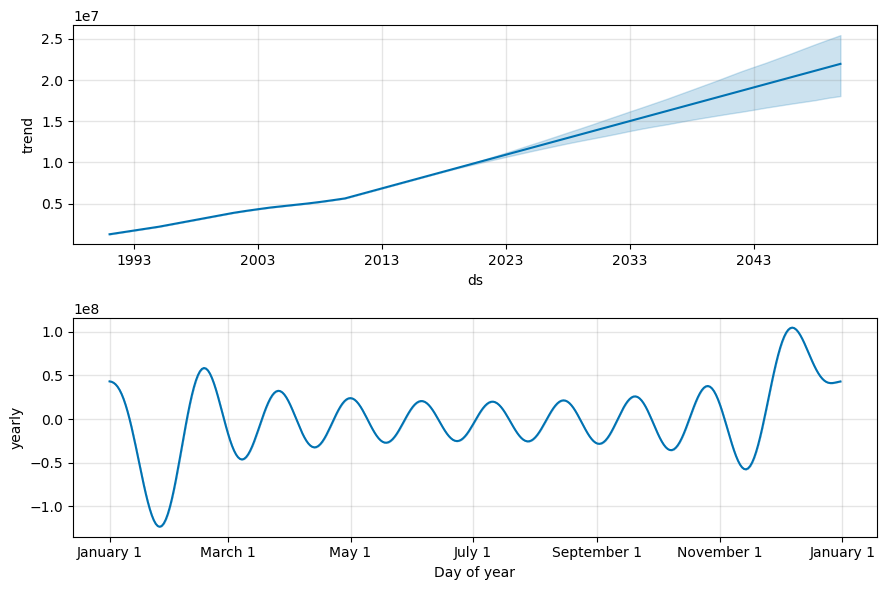

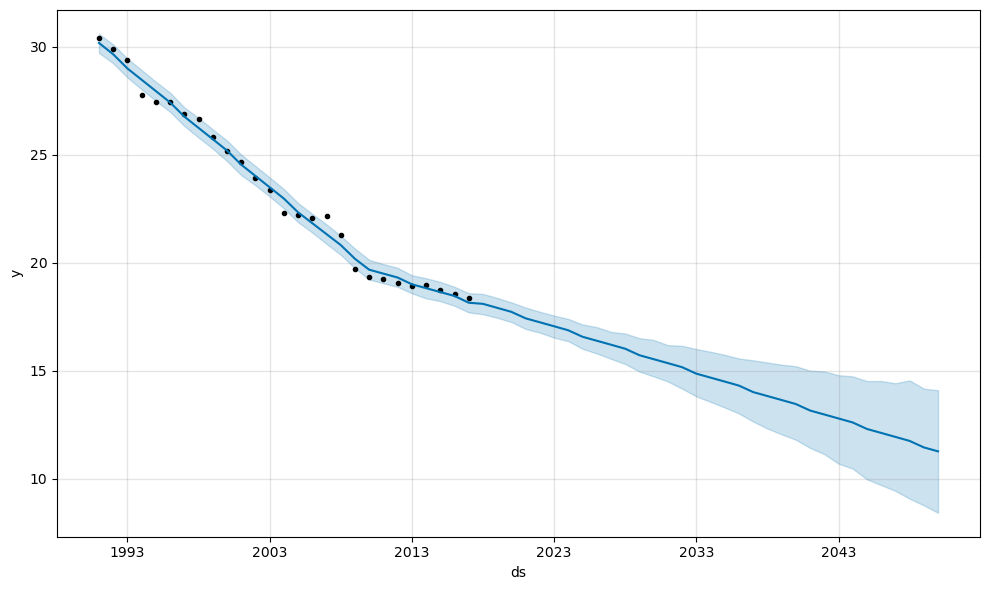

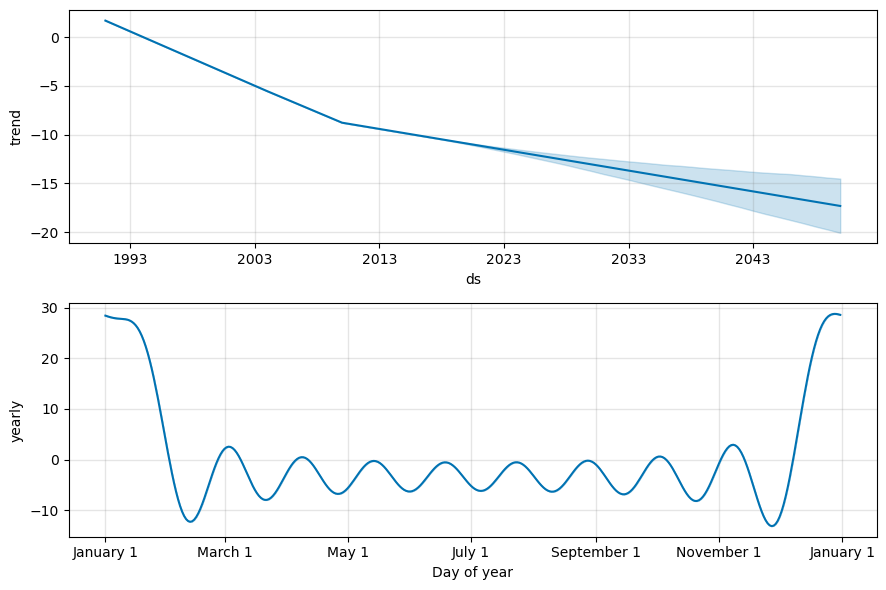

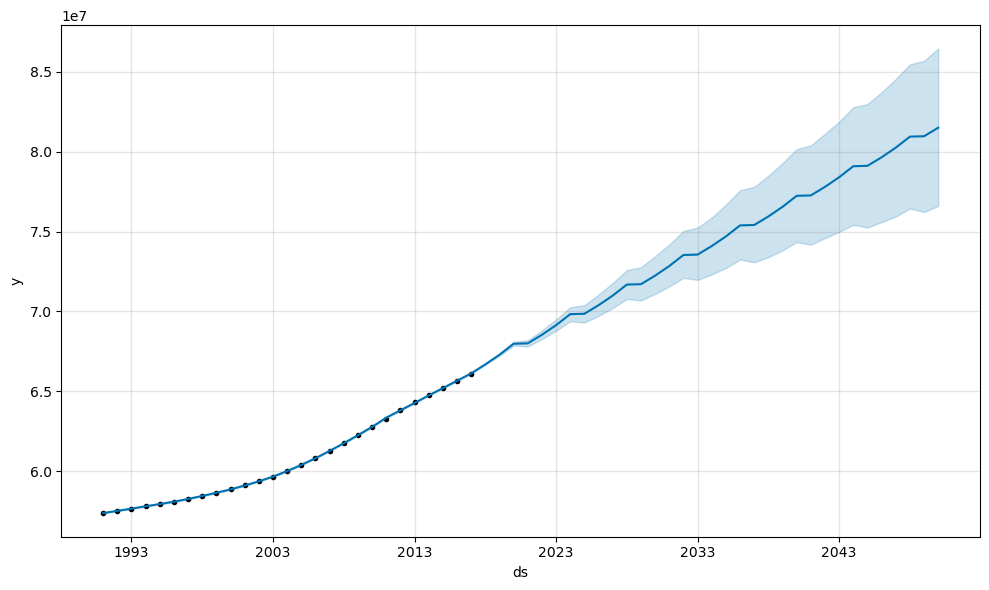

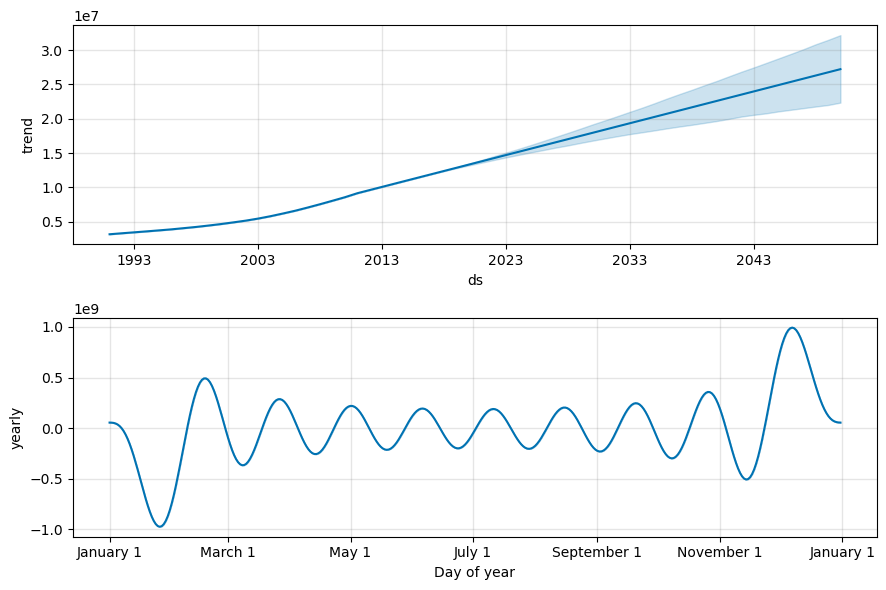

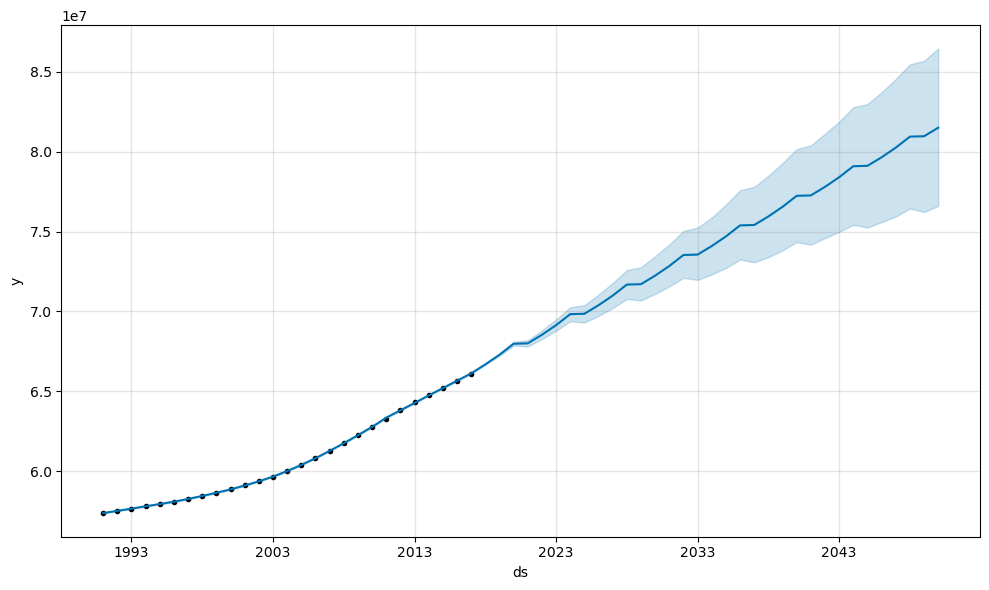

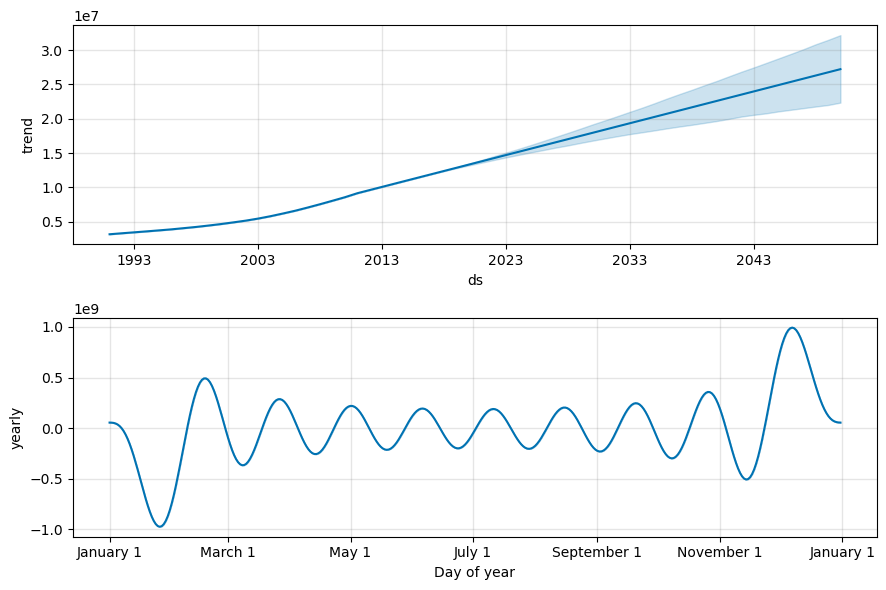

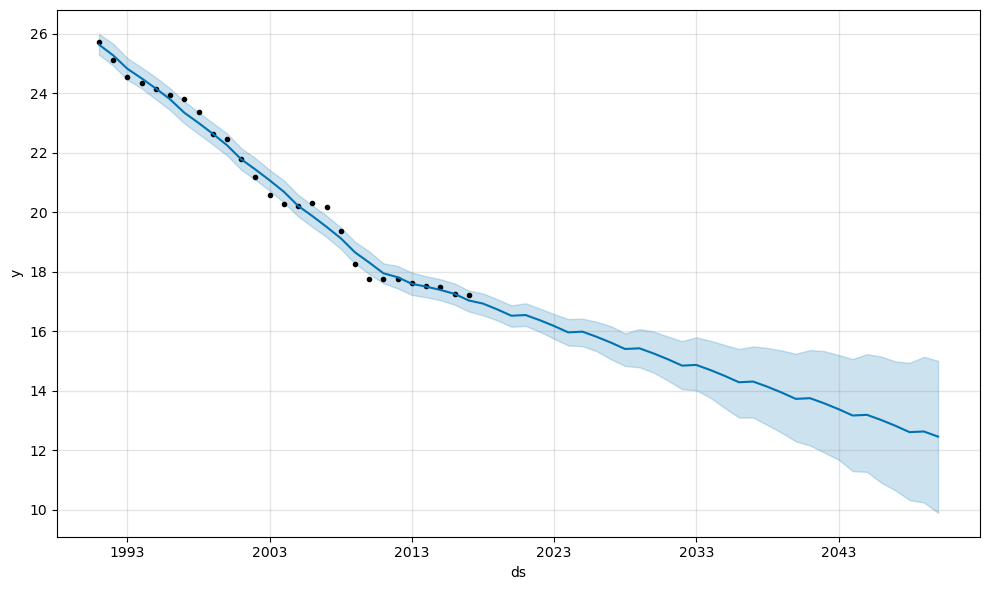

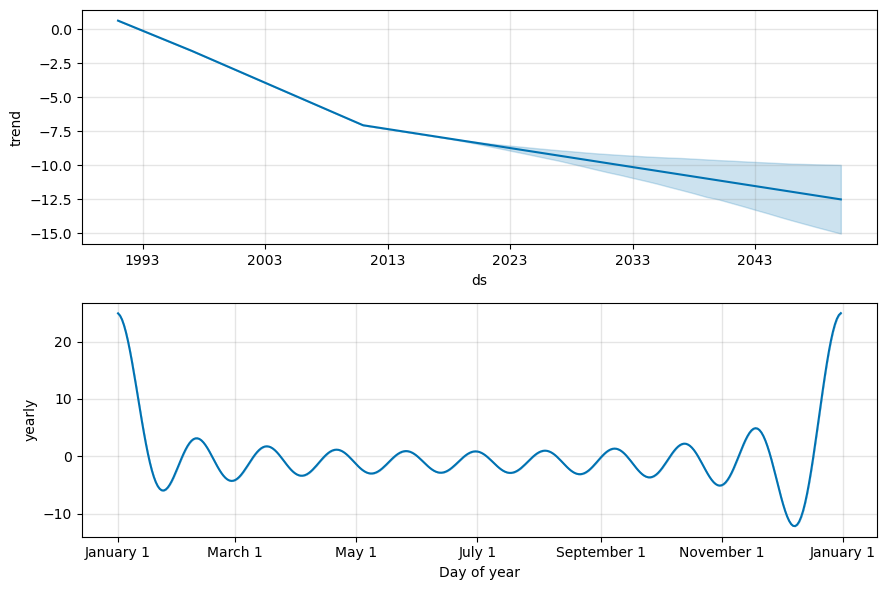

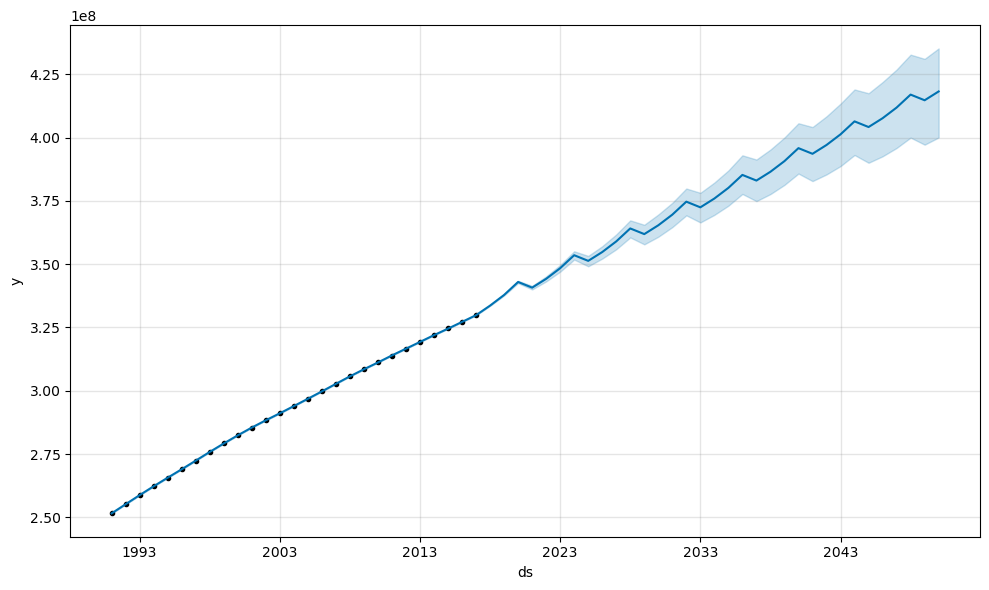

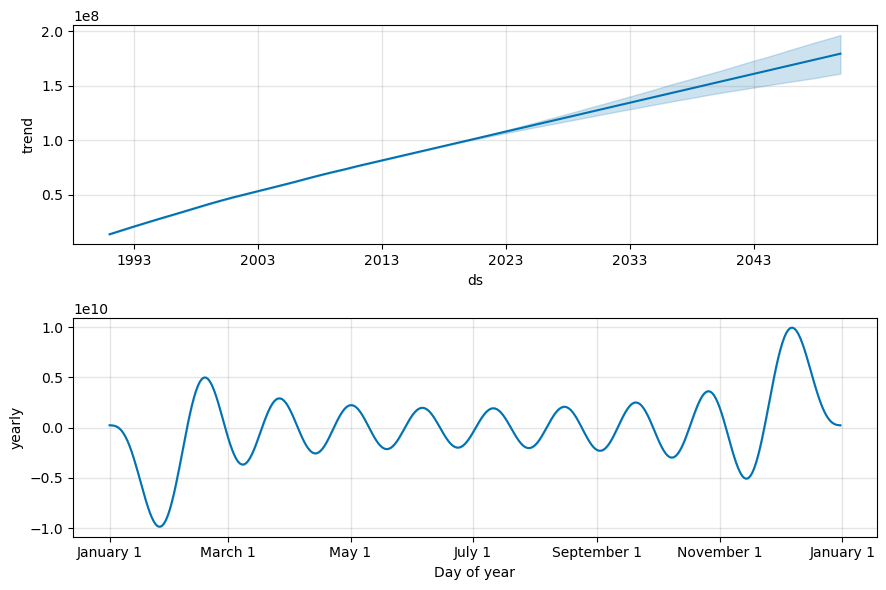

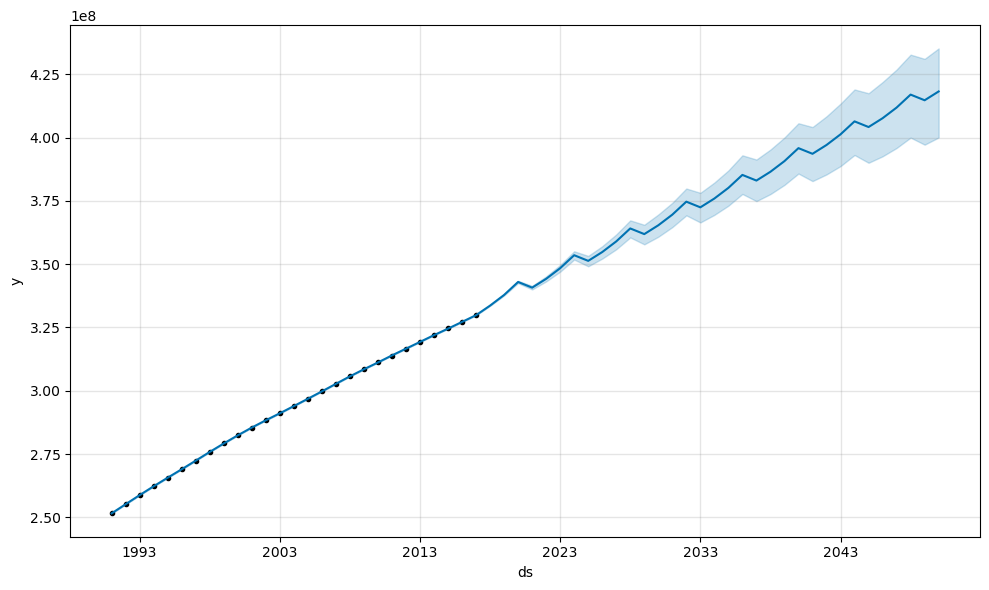

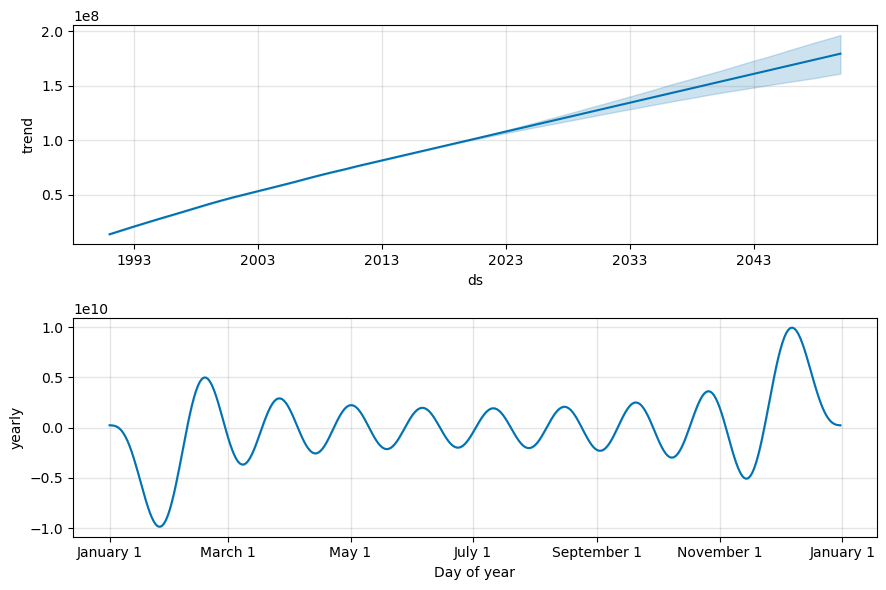

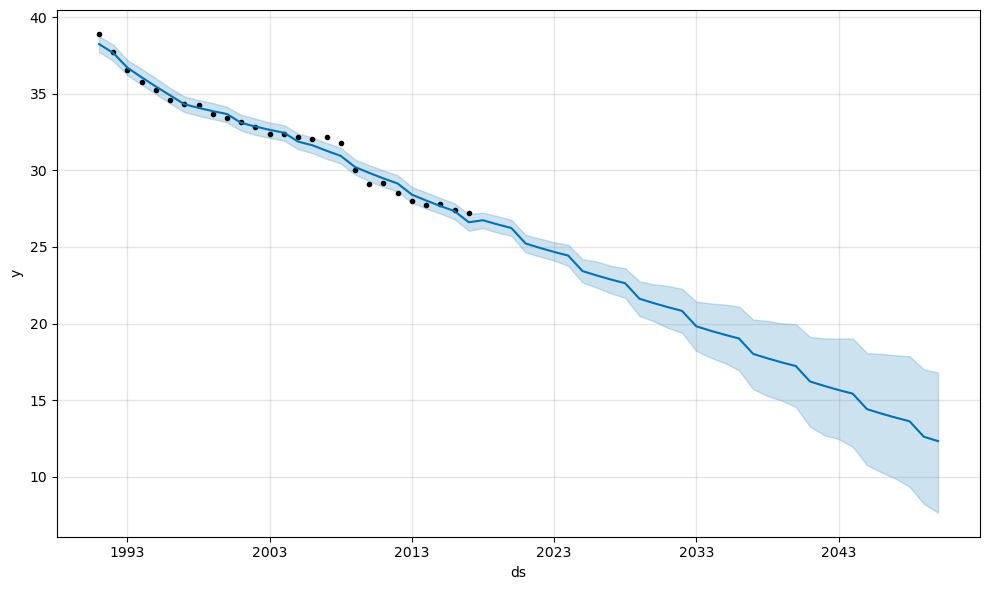

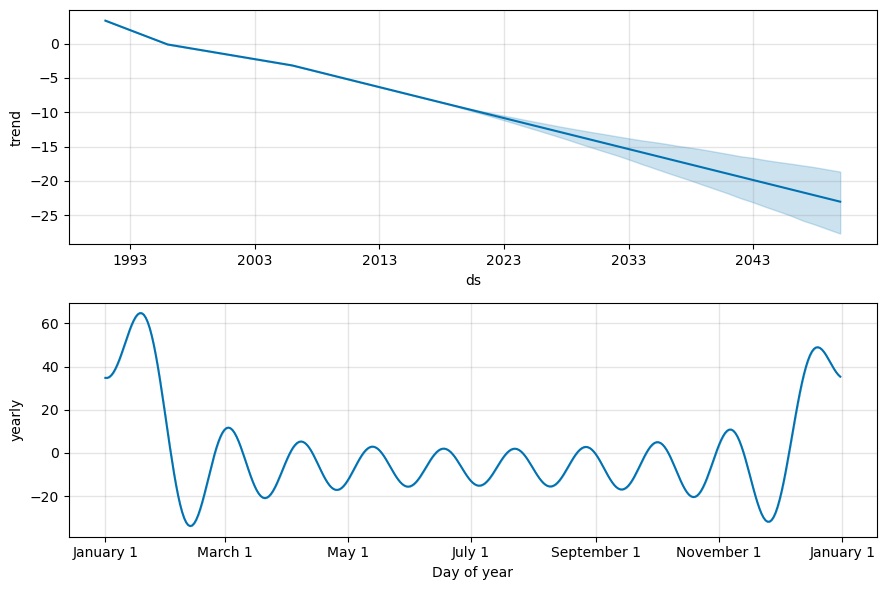

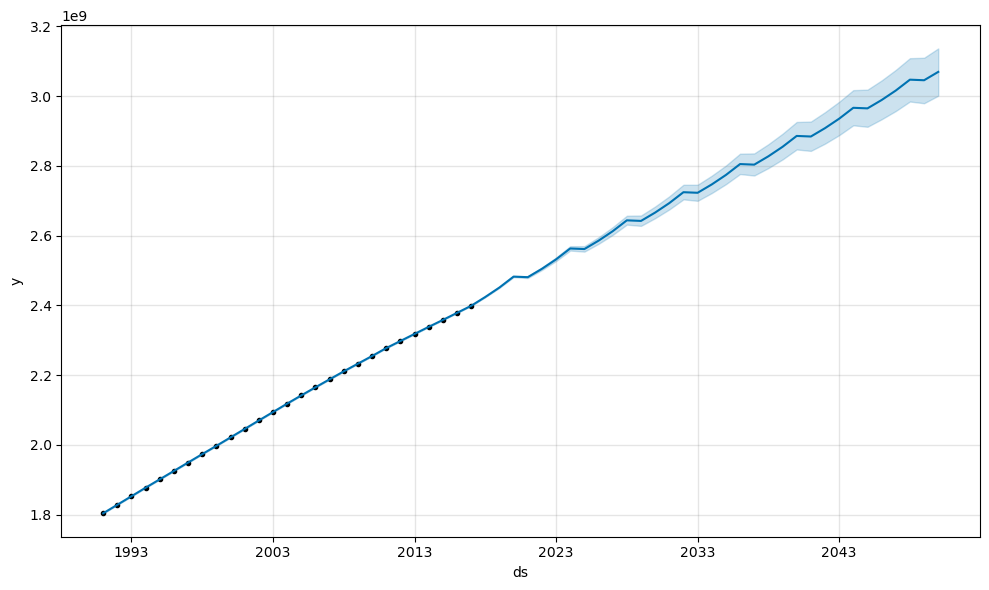

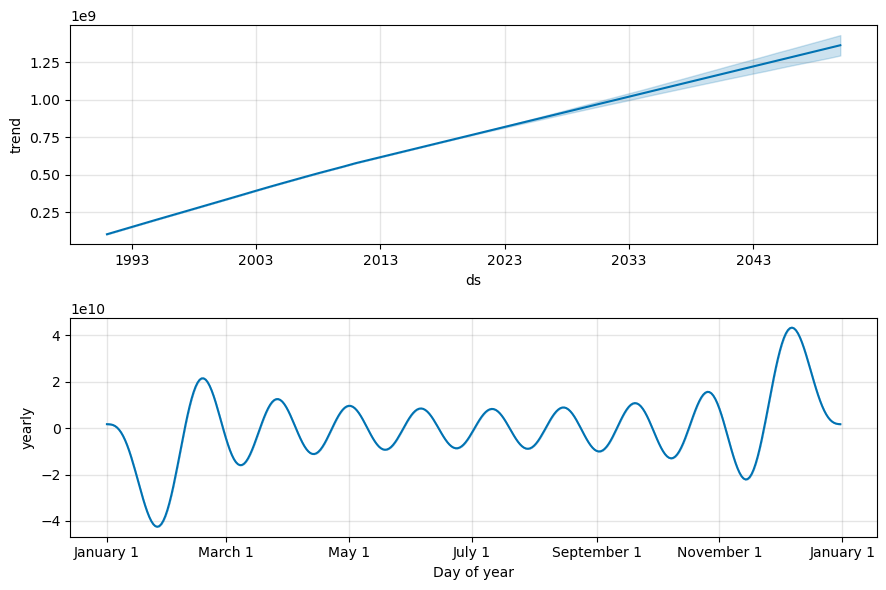

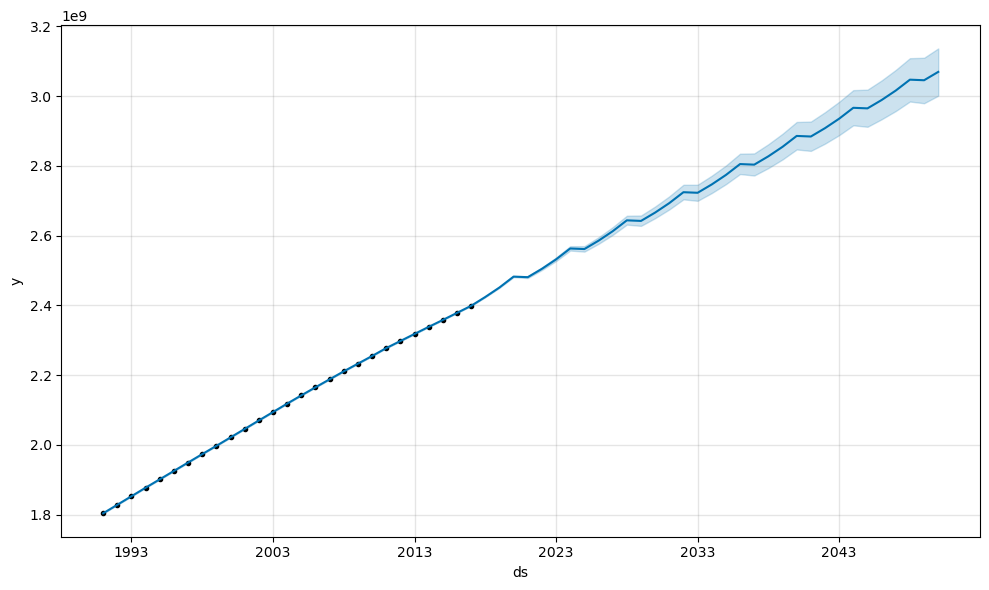

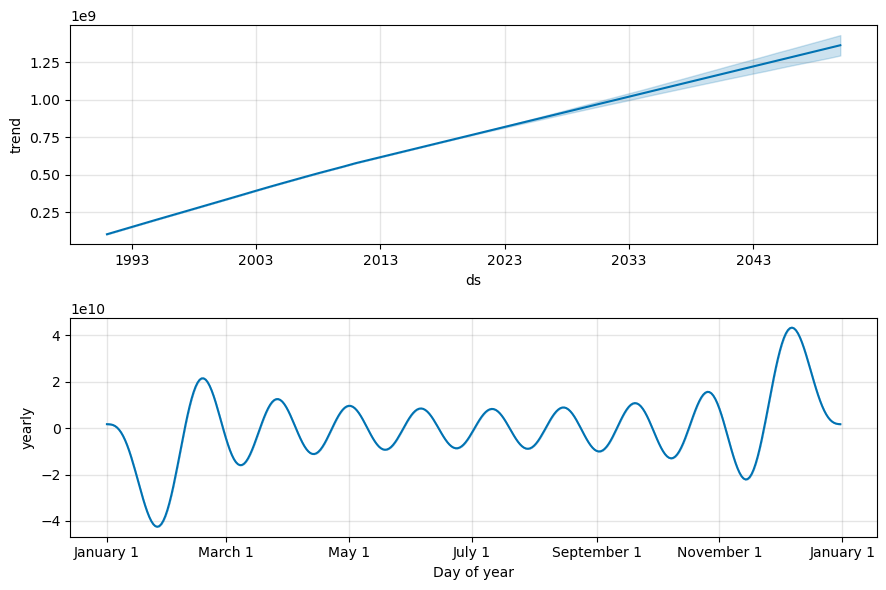

In [36]:
from prophet import Prophet
data_to_add_together=[]
for i in list(data['Entity'].unique()):
    data_time_cool=pd.DataFrame([[float(j)] for j in range(1991,2051)],columns=["Year"])
    data_country_cool=pd.DataFrame([[i]]*60,columns=["Entity"])
    data_time_series_for_specific_country=data[data['Entity']==i]
    data_time_series_for_specific_country=data_time_series_for_specific_country.reset_index(drop=True)
    data_time_series_for_specific_country_year=pd.DataFrame(data_time_series_for_specific_country['Year'])
    data_time_series_for_specific_country_popu=pd.DataFrame(data_time_series_for_specific_country['Population'])
    data_time_series_for_specific_country_indu=pd.DataFrame(data_time_series_for_specific_country['indu_rate'])
    data_time_series_for_specific_country_co2=pd.DataFrame(data_time_series_for_specific_country['Annual CO₂ emissions per GDP (kg per international-$)'])
    data_time_series_for_specific_country_indu = data_time_series_for_specific_country_indu.rename(columns={"indu_rate": "y"})
    data_time_series_for_specific_country_popu = data_time_series_for_specific_country_popu.rename(columns={"Population": "y"})
    data_time_series_for_specific_country_year = data_time_series_for_specific_country_year.rename(columns={"Year":"ds"})
    data_time_series_for_specific_country_co2  = data_time_series_for_specific_country_co2.rename(columns={"Annual CO₂ emissions per GDP (kg per international-$)": "y"})
    data_time_series_for_specific_country_year['ds']=pd.to_datetime(data_time_series_for_specific_country_year['ds'].astype(int).astype(str) + '-01-01')
    data_time_series_for_specific_country_indu_train= pd.concat([data_time_series_for_specific_country_year,data_time_series_for_specific_country_indu],axis=1)
    data_time_series_for_specific_country_popu_train = pd.concat([data_time_series_for_specific_country_year,data_time_series_for_specific_country_popu],axis=1)
    data_time_series_for_specific_country_co2_train  = pd.concat([data_time_series_for_specific_country_year,data_time_series_for_specific_country_co2],axis=1)
    model_for_indu=Prophet()
    model_for_popu=Prophet()
    model_for_co2 =Prophet()
    model_for_indu.fit(data_time_series_for_specific_country_indu_train)
    model_for_popu.fit(data_time_series_for_specific_country_popu_train)
    model_for_co2.fit(data_time_series_for_specific_country_co2_train)
    future = model_for_indu.make_future_dataframe(periods=33, freq='Y') 
    forecast_indu = model_for_indu.predict(future)
    fig1 = model_for_indu.plot(forecast_indu)
    fig2 = model_for_indu.plot_components(forecast_indu)
    future = model_for_popu.make_future_dataframe(periods=33, freq='Y') 
    forecast_popu = model_for_popu.predict(future)
    fig3 = model_for_popu.plot(forecast_popu)
    fig4 = model_for_popu.plot_components(forecast_popu)
    future = model_for_popu.make_future_dataframe(periods=33, freq='Y') 
    forecast_co2 = model_for_popu.predict(future)
    fig5 = model_for_popu.plot(forecast_popu)
    fig6 = model_for_popu.plot_components(forecast_popu)
    fig1.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/indu_rate_predic_"+i+"_.png")
    fig2.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/indu_rate_predic_trend"+i+"_.png")
    fig3.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/population_predic_"+i+"_.png")
    fig4.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/population_predic_trend"+i+"_.png")
    fig5.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/co2_per_GDP_predic_"+i+"_.png")
    fig6.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/co2_per_GDP_predic_trend"+i+"_.png")
    data_indu_final_final=pd.DataFrame(forecast_indu["yhat"])
    data_popu_final_final=pd.DataFrame(forecast_popu['yhat'])
    data_co2_final_final =pd.DataFrame(forecast_co2['yhat'])
    data_indu_final_final.rename(columns={"yhat":"indu_rate"},inplace=True)
    data_popu_final_final.rename(columns={"yhat":"Population"},inplace=True)
    data_co2_final_final.rename(columns={"yhat":'Annual CO₂ emissions per GDP (kg per international-$)'},inplace=True)
    data_feature_final_final=pd.concat([data_country_cool, data_time_cool,data_popu_final_final,data_co2_final_final,data_indu_final_final],axis=1)
    data_to_add_together.append(data_feature_final_final)
data_final_with_future_popu_indu=pd.DataFrame(columns=["Entity","Year","Population","indu_rate",'Annual CO₂ emissions per GDP (kg per international-$)'])
for i in data_to_add_together:
    data_final_with_future_popu_indu=pd.concat([data_final_with_future_popu_indu,i],axis=0,ignore_index=True)
    
data_final_with_future_popu_indu

# This is the speicific library to handle with time-series

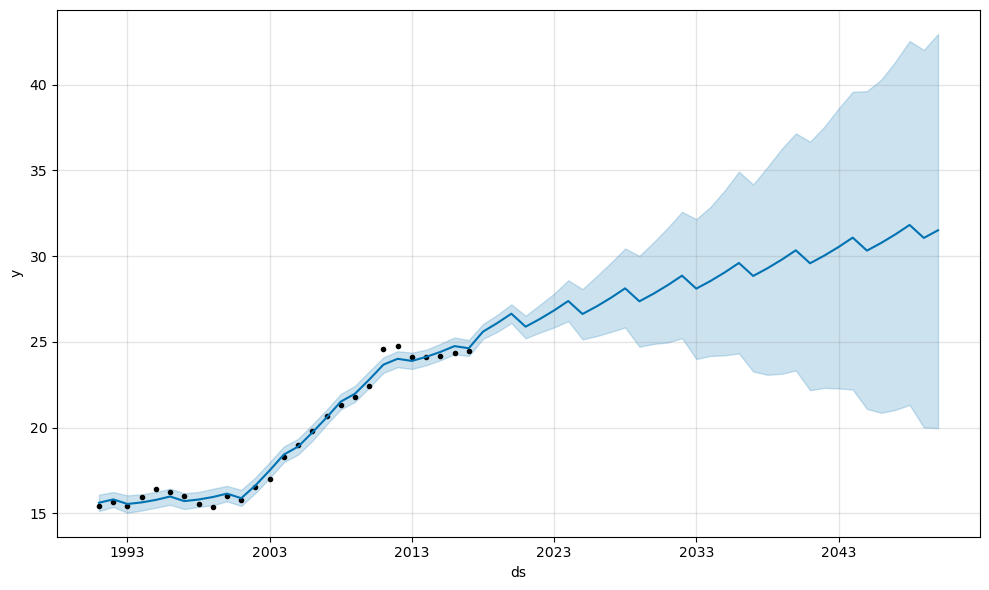

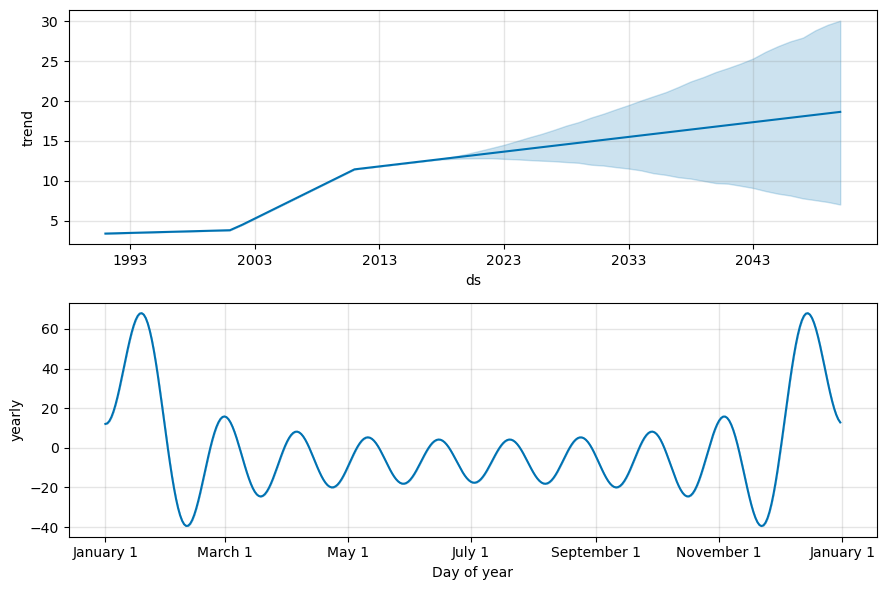

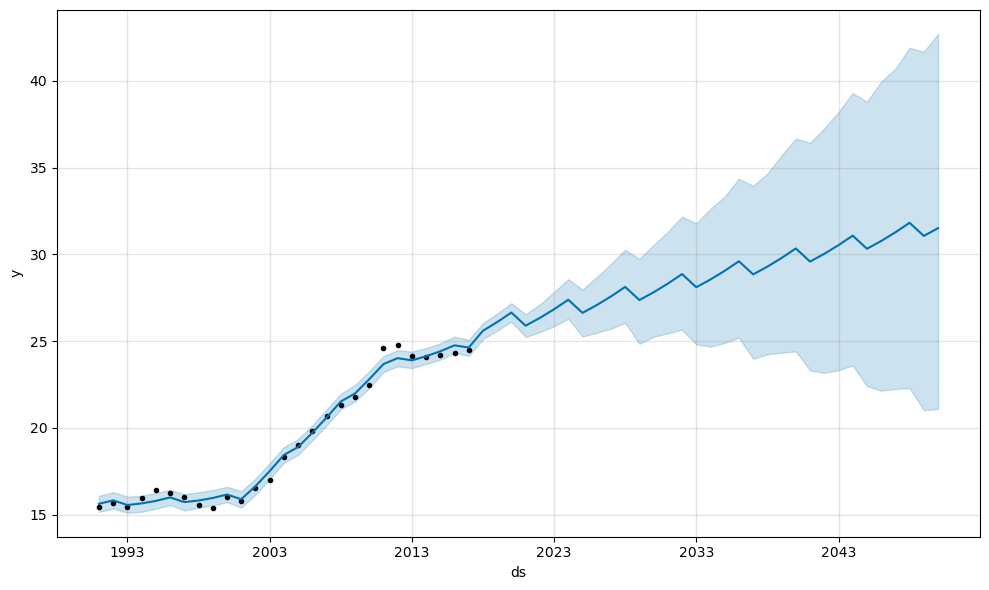

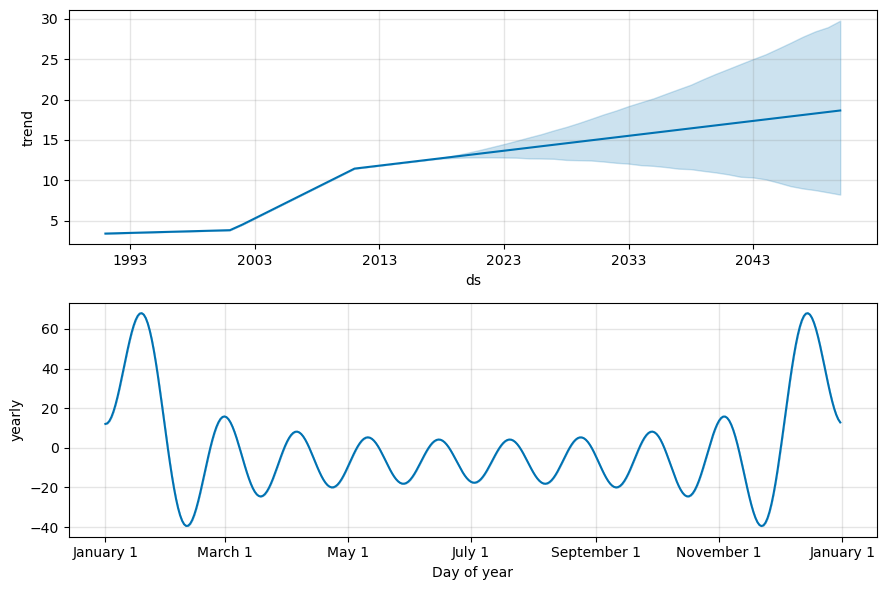

In [173]:
future = model_for_indu.make_future_dataframe(periods=33, freq='Y') 
forecast = model_for_indu.predict(future)
fig1 = model_for_indu.plot(forecast)
fig2 = model_for_indu.plot_components(forecast)
future = model_for_popu.make_future_dataframe(periods=33, freq='Y') 
forecast = model_for_indu.predict(future)
fig3 = model_for_indu.plot(forecast)
fig4 = model_for_indu.plot_components(forecast)

In [159]:
ff.to_csv("这他妈是什么奇怪的东西.csv")

In [174]:
data['Entity'].unique()

array(['Canada', 'India', 'Japan', 'South Korea', 'United Kingdom',
       'United States', 'EU'], dtype=object)

22:51:27 - cmdstanpy - INFO - Chain [1] start processing
22:51:28 - cmdstanpy - INFO - Chain [1] done processing
22:51:28 - cmdstanpy - INFO - Chain [1] start processing
22:51:28 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  1991-01-01  -3.802582   21.598088   22.358996    -3.802582    -3.802582   
1  1992-01-01  -3.745465   21.606922   22.376807    -3.745465    -3.745465   
2  1993-01-01  -3.688192   21.494128   22.295778    -3.688192    -3.688192   
3  1994-01-01  -3.631075   21.691628   22.505275    -3.631075    -3.631075   
4  1995-01-01  -3.573947   21.787357   22.578017    -3.573947    -3.573947   
5  1996-01-01  -3.516814   21.830316   22.627031    -3.516814    -3.516814   
6  1997-01-01  -3.459525   21.714216   22.501276    -3.459525    -3.459525   
7  1998-01-01  -3.402392   21.931820   22.700855    -3.402392    -3.402392   
8  1999-01-01  -3.345269   22.036038   22.836612    -3.345269    -3.345269   
9  2000-01-01  -3.288897   22.031176   22.845975    -3.288897    -3.288897   
10 2001-01-01  -3.233169   21.920268   22.730593    -3.233169    -3.233169   
11 2002-01-01  -3.302243   22.020509   22.797402    -3.302243    -3.302243   
12 2003-01-01  -3.495062   21.893016   22.672197    -3.495062    -3.495062   
13 2004-01-01  -3.688937   21.639863   22.438668    -3.688937    -3.688937   
14 2005-01-01  -3.899325   21.274712   22.089488    -3.899325    -3.899325   
15 2006-01-01  -4.109937   21.251548   22.043032    -4.109937    -4.109937   
16 2007-01-01  -4.320549   21.059584   21.828671    -4.320549    -4.320549   
17 2008-01-01  -4.531161   20.800347   21.610020    -4.531161    -4.531161   
18 2009-01-01  -4.742351   20.453503   21.205368    -4.742351    -4.742351   
19 2010-01-01  -4.952959   20.406242   21.160563    -4.952959    -4.952959   
20 2011-01-01  -5.163553   20.197246   21.011930    -5.163553    -5.163553   
21 2012-01-01  -5.373684   19.955684   20.767172    -5.373684    -5.373684   
22 2013-01-01  -5.584391   19.597895   20.443594    -5.584391    -5.584391   
23 2014-01-01  -5.794522   19.569051   20.360336    -5.794522    -5.794522   
24 2015-01-01  -6.004653   19.419520   20.152161    -6.004653    -6.004653   
25 2016-01-01  -6.214783   19.153005   19.944521    -6.214783    -6.214783   
26 2017-01-01  -6.425490   18.766629   19.548731    -6.425490    -6.425490   
27 2017-12-31  -6.635045   18.285724   19.086624    -6.644384    -6.625665   
28 2018-12-31  -6.845176   17.682382   18.450987    -6.876312    -6.815584   
29 2019-12-31  -7.055307   16.948664   17.809503    -7.118152    -6.999307   
30 2020-12-31  -7.266013   17.887852   18.706431    -7.363597    -7.176134   
31 2021-12-31  -7.476144   17.428643   18.241658    -7.607633    -7.348114   
32 2022-12-31  -7.686275   16.804975   17.679130    -7.861810    -7.521871   
33 2023-12-31  -7.896406   16.093233   17.005872    -8.116826    -7.686647   
34 2024-12-31  -8.107113   16.959027   17.940246    -8.378651    -7.851616   
35 2025-12-31  -8.317243   16.469569   17.533255    -8.636929    -8.010738   
36 2026-12-31  -8.527374   15.841769   16.962947    -8.901681    -8.165322   
37 2027-12-31  -8.737505   15.099026   16.296184    -9.173138    -8.314943   
38 2028-12-31  -8.948212   15.986984   17.251505    -9.438427    -8.469203   
39 2029-12-31  -9.158343   15.467689   16.857382    -9.715109    -8.620727   
40 2030-12-31  -9.368473   14.814677   16.306942    -9.982397    -8.742353   
41 2031-12-31  -9.578604   14.070672   15.655573   -10.250108    -8.881220   
42 2032-12-31  -9.789311   14.914902   16.635521   -10.546595    -9.010138   
43 2033-12-31  -9.999442   14.366885   16.235024   -10.835741    -9.131043   
44 2034-12-31 -10.209573   13.631269   15.723662   -11.130230    -9.270342   
45 2035-12-31 -10.419703   12.889941   15.108770   -11.417717    -9.389845   
46 2036-12-31 -10.630410   13.773781   16.152799   -11.716155    -9.509727   
47 2037-12-31 -10.840541   13.180041   15.701342   -12.022673    -9.654384   
48 2038-12-31 -11.050672   12.500633   15.211649   -12.346875    -9.776557   
49 2039-12-31 -11.260803   11.736571   14.581128   -12.682993    -9.894201   
50 2040-12-31 -11.471509   12.593

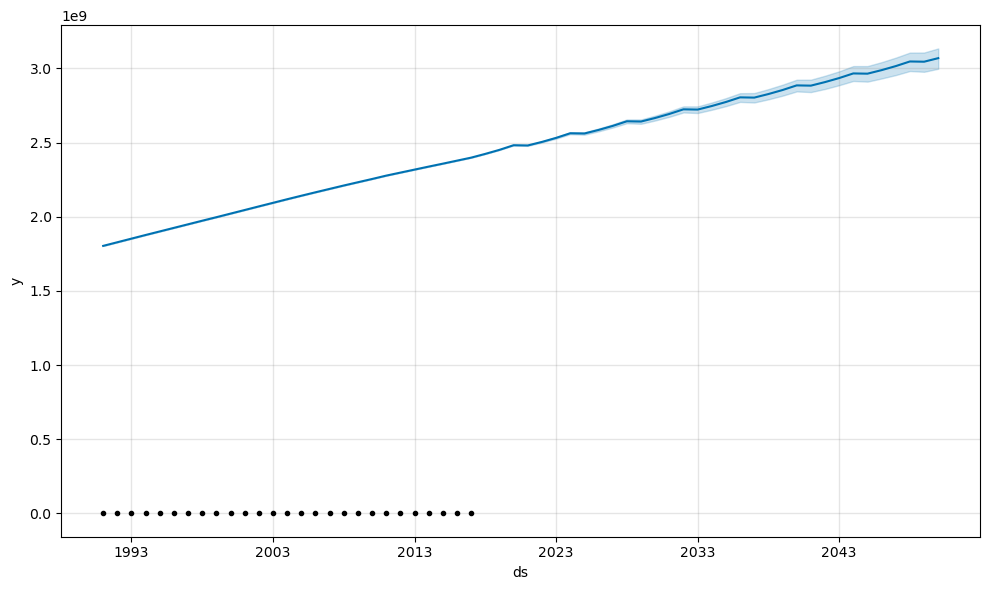

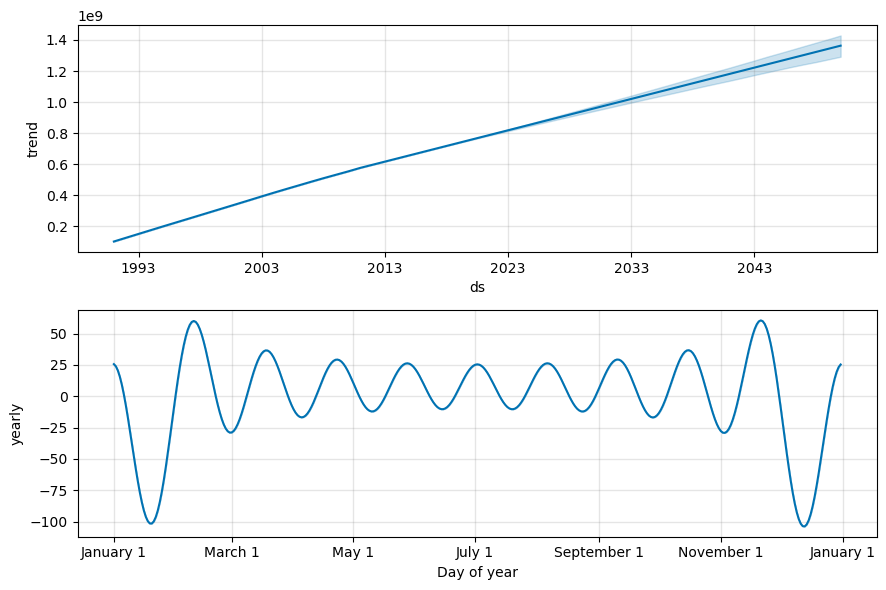

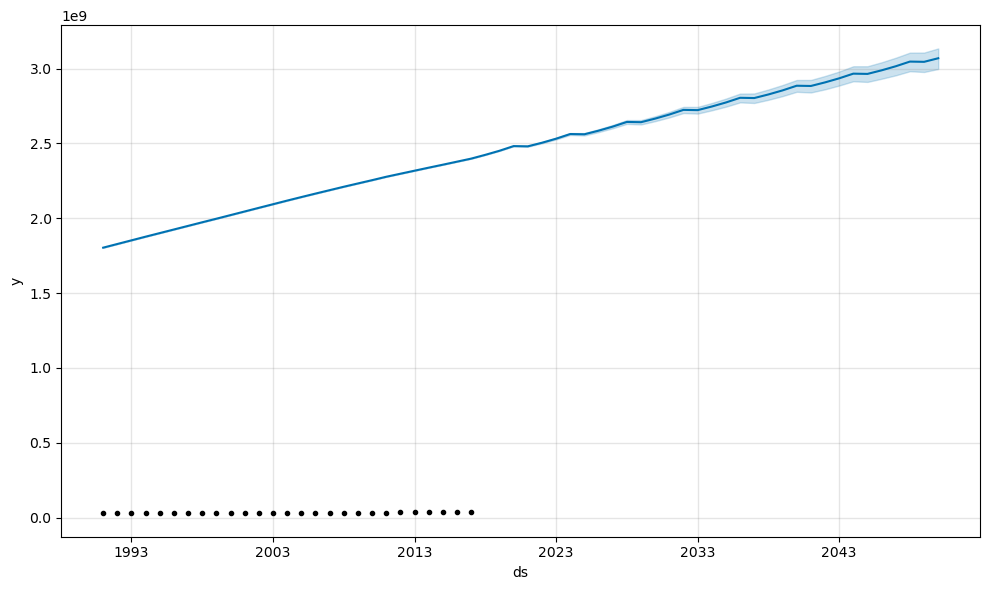

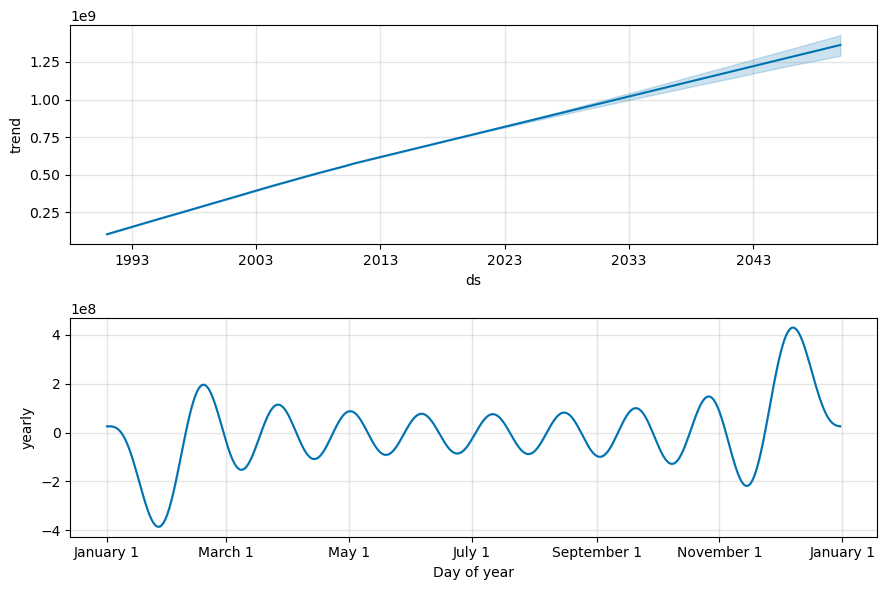

/Users/catillzhang/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


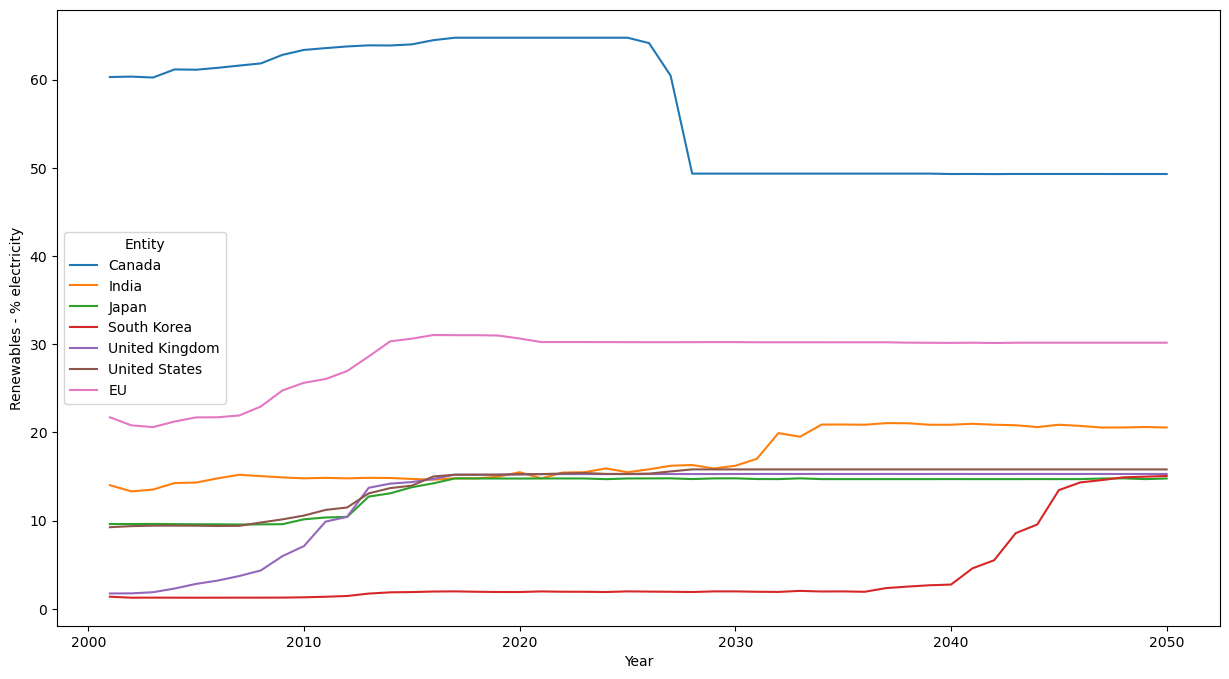

In [41]:
import seaborn as sb
data=data_final_with_future_popu_indu
country_name=pd.DataFrame(data['Entity'])
Encoder=OneHotEncoder(sparse=False)
encoded_data=Encoder.fit_transform(country_name)
encoded_df=pd.DataFrame(encoded_data,columns=Encoder.get_feature_names_out())
data_feature=data[feature]
data_feature=pd.concat([data_feature,encoded_df],axis=1)
X=data_feature
y=random_regressior.predict(X)
data_result=pd.DataFrame(y,columns=["Renewables - % electricity"])
data_final=pd.concat([data,data_result],axis=1)
data_final=data_final[data_final['Year']>2000]
g = sb.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_final)
# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# We can conclude from the data that:
# 1.All those quite developed countries, most of which hava a relatively long history of adapting clean energy, will end up turning back to fossil fuel
# The reason might be that the population just keep growing, and in this model we suppose the speed for develping new tech regarding clean energy stay the same without any boost in productivity,the clean might fail to  support the large population, and the climate might finally collapse
# 2. As for South Korean, the prediction shows that due to its very weak trandition of adapting clean energy, much space will be left to turn to use clean energy
# 3. By these data, MORE EFFORT IN DEVELOPING TECHNOLOGY, PRODUCTS, FACILITY TO BOOST THE USE OF CLEAN ENERGY IS EXTREMELY NECESSARY. OTHERWISE, THE CLIMATE CHANGE MIGHT GET OUT OF CONTROL
# 4.It is also interesting to find that countries has similar economy structure and industrail structure(UK,US, JAPAN,KOREAN) turn to end up in the same situation. They will eventually reach a point(at about 15%) and no more preogress can be made.
# These findings really remind us it is quite emergent to develop brand new means to tackle with climate chang before its too late

# Model 2 Concider the original data(the percentage of clean energy change over time) to directly build  a time-series model.

In [246]:
data=pd.read_csv("/Users/catillzhang/Downloads/data_with_popu_indu.csv")
data=data[["Entity","Year","Renewables - % electricity"]]
data

Entity    Year  Renewables - % electricity
0    Canada  1991.0                   61.393510
1    Canada  1992.0                   61.643684
2    Canada  1993.0                   61.688430
3    Canada  1994.0                   60.328484
4    Canada  1995.0                   61.172176
..      ...     ...                         ...
184      EU  2013.0                   33.830066
185      EU  2014.0                   36.361344
186      EU  2015.0                   37.083920
187      EU  2016.0                   39.064648
188      EU  2017.0                   40.051834

[189 rows x 3 columns]

21:31:03 - cmdstanpy - INFO - Chain [1] start processing
21:31:03 - cmdstanpy - INFO - Chain [1] done processing
21:31:04 - cmdstanpy - INFO - Chain [1] start processing
21:31:04 - cmdstanpy - INFO - Chain [1] done processing
21:31:04 - cmdstanpy - INFO - Chain [1] start processing
21:31:04 - cmdstanpy - INFO - Chain [1] done processing
21:31:04 - cmdstanpy - INFO - Chain [1] start processing
21:31:04 - cmdstanpy - INFO - Chain [1] done processing
21:31:05 - cmdstanpy - INFO - Chain [1] start processing
21:31:05 - cmdstanpy - INFO - Chain [1] done processing
21:31:05 - cmdstanpy - INFO - Chain [1] start processing
21:31:05 - cmdstanpy - INFO - Chain [1] done processing
21:31:05 - cmdstanpy - INFO - Chain [1] start processing
21:31:05 - cmdstanpy - INFO - Chain [1] done processing


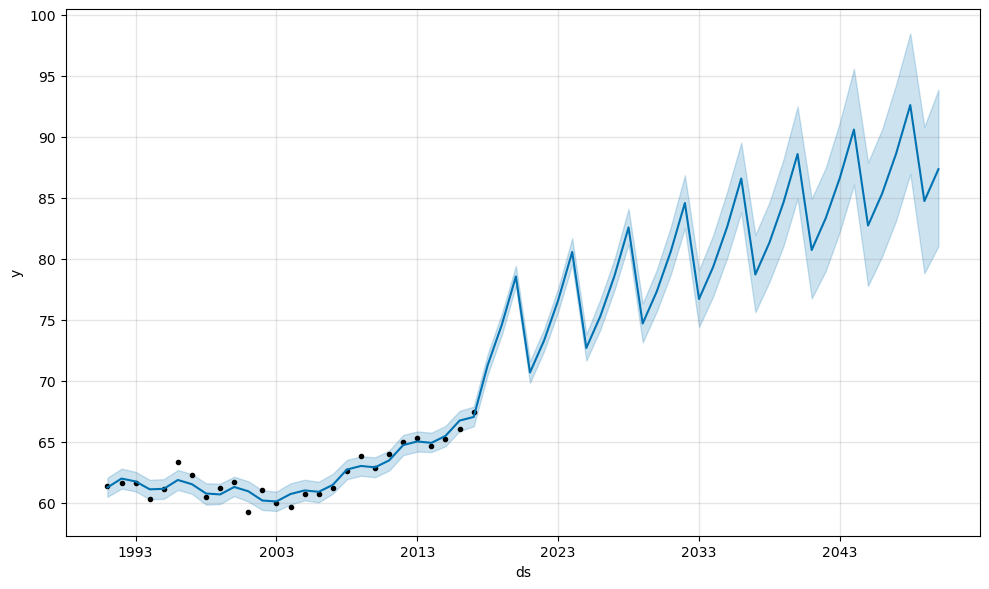

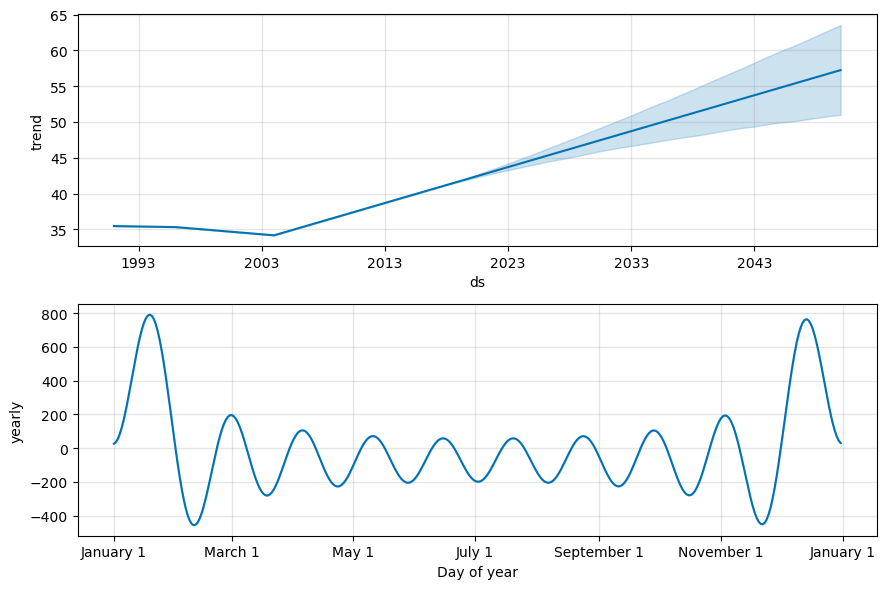

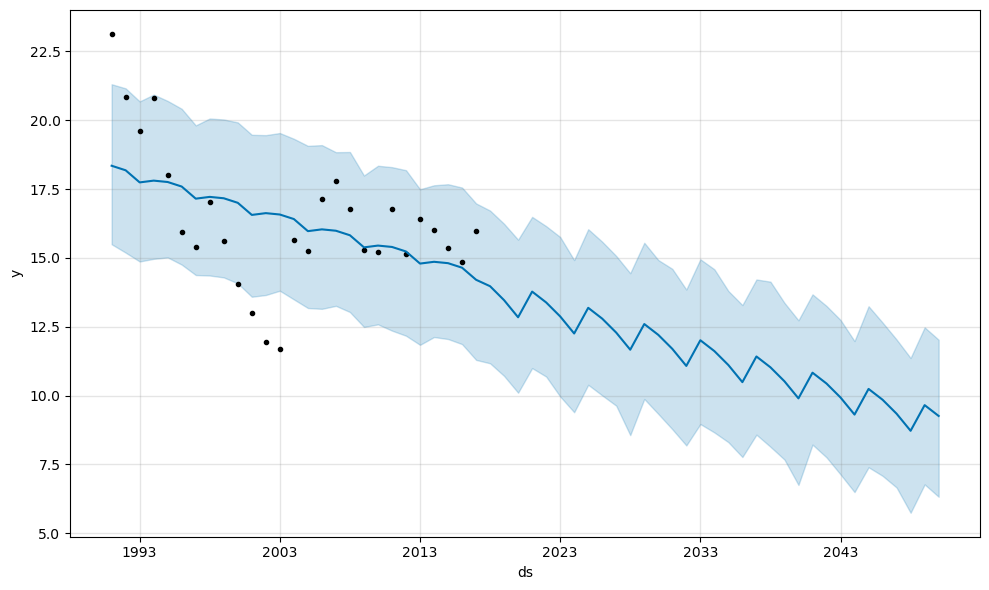

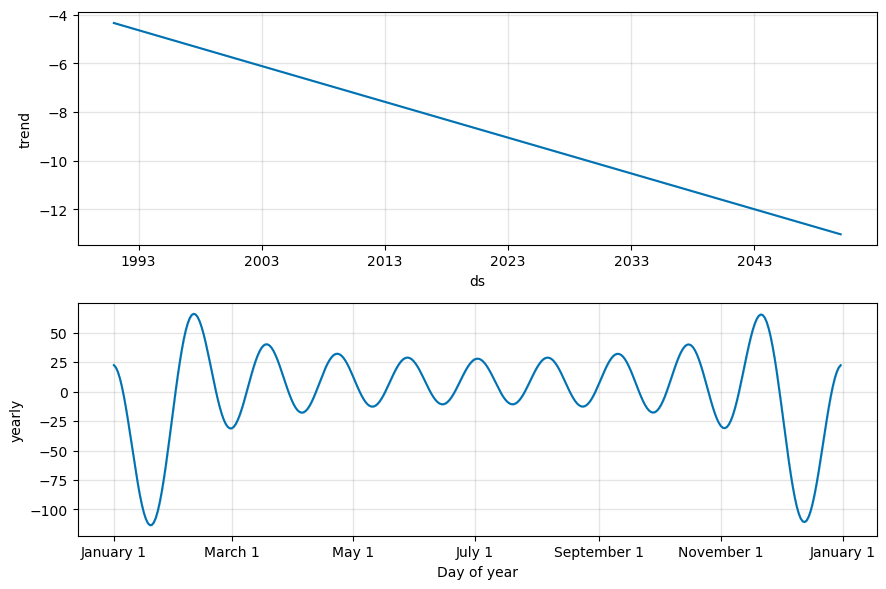

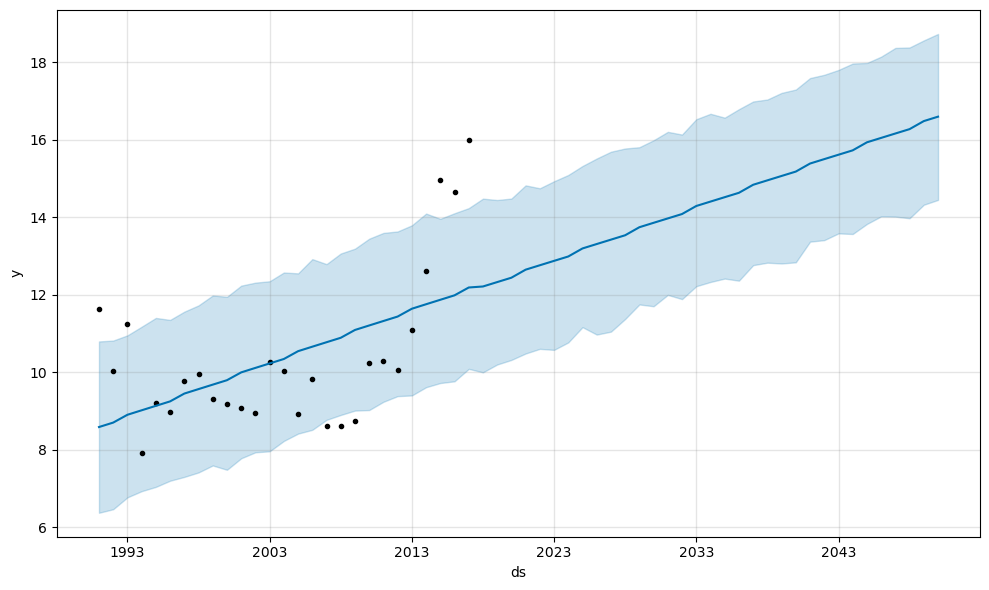

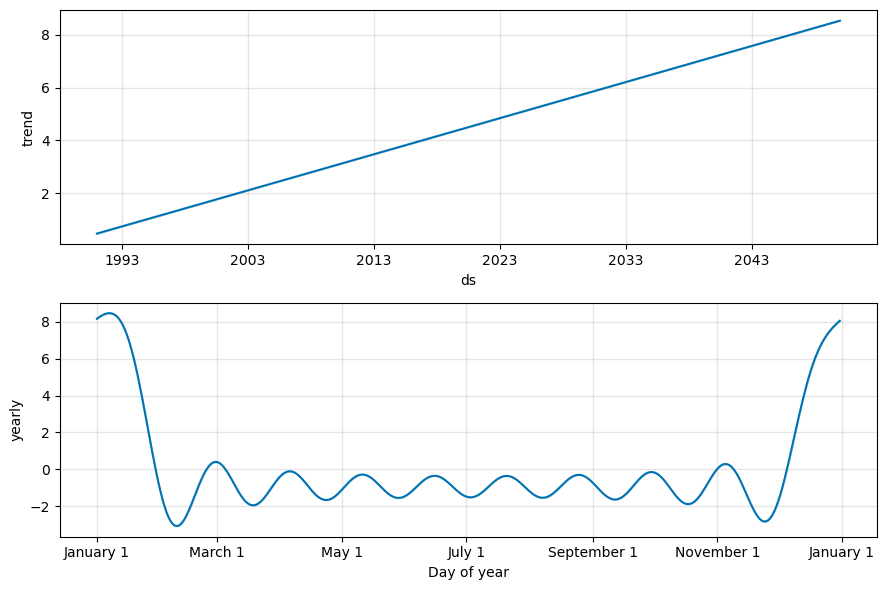

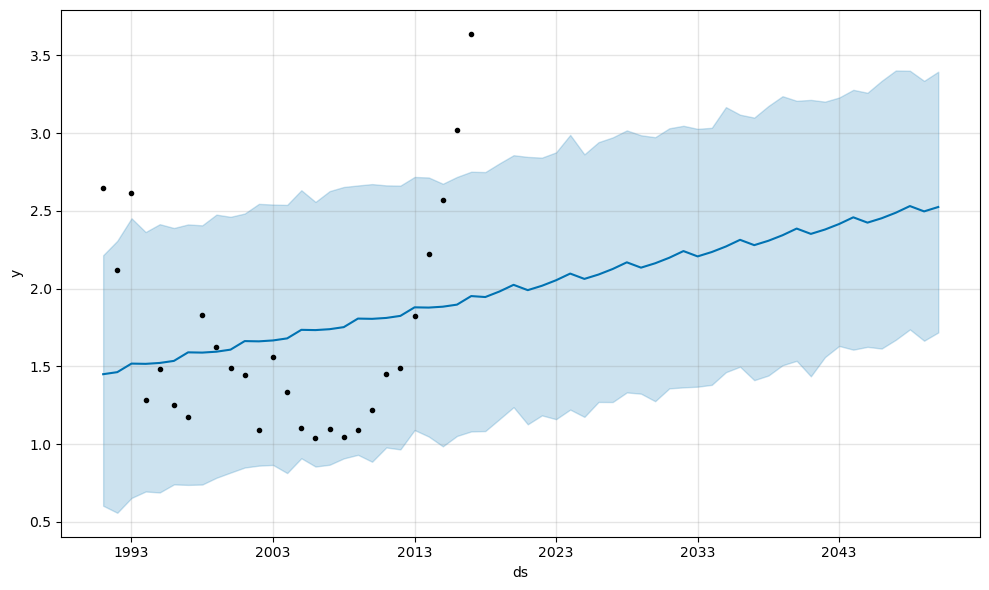

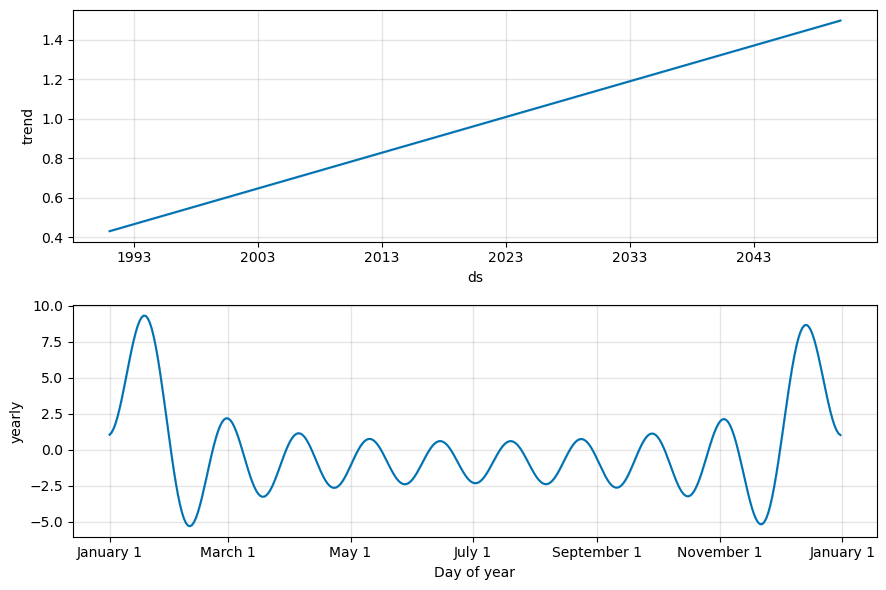

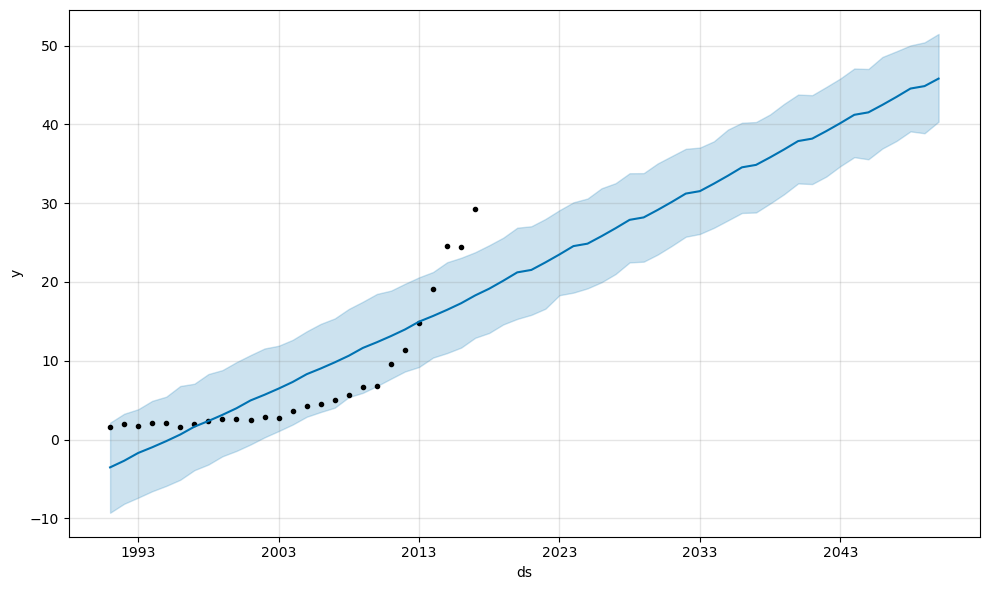

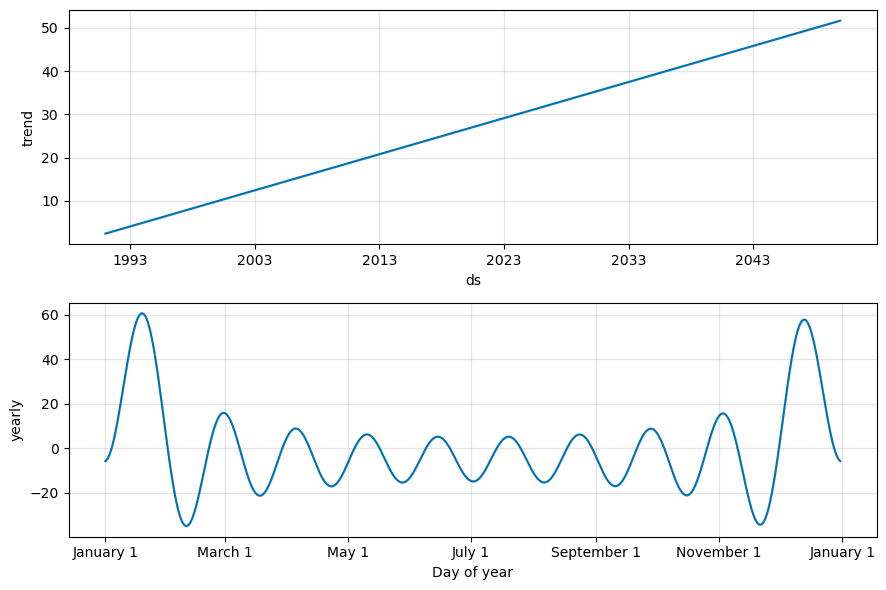

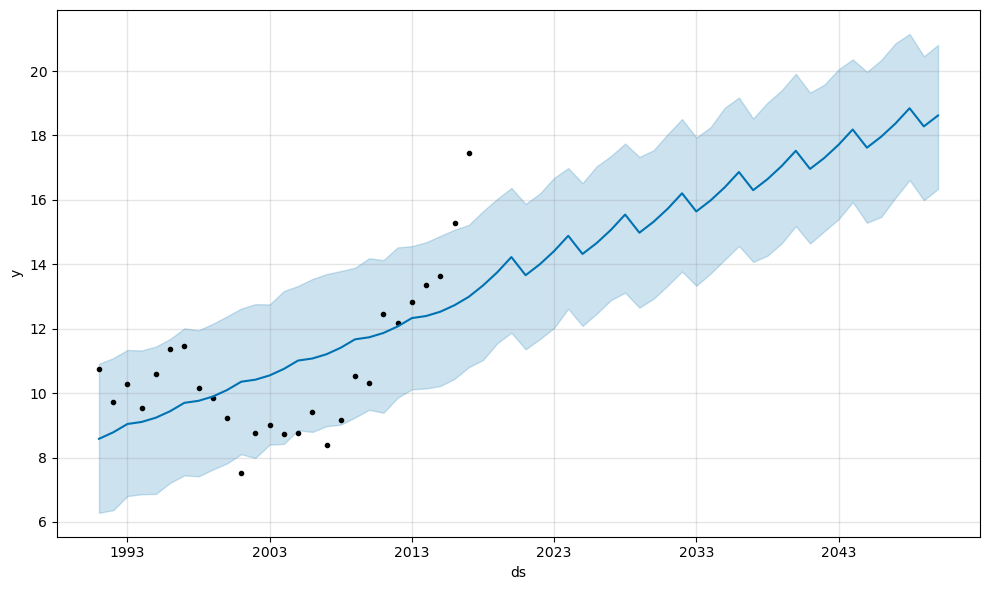

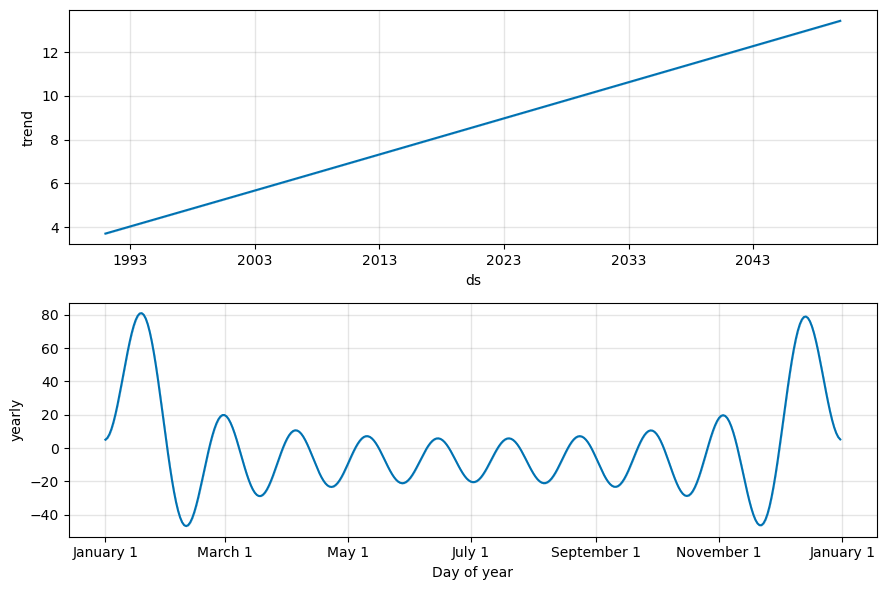

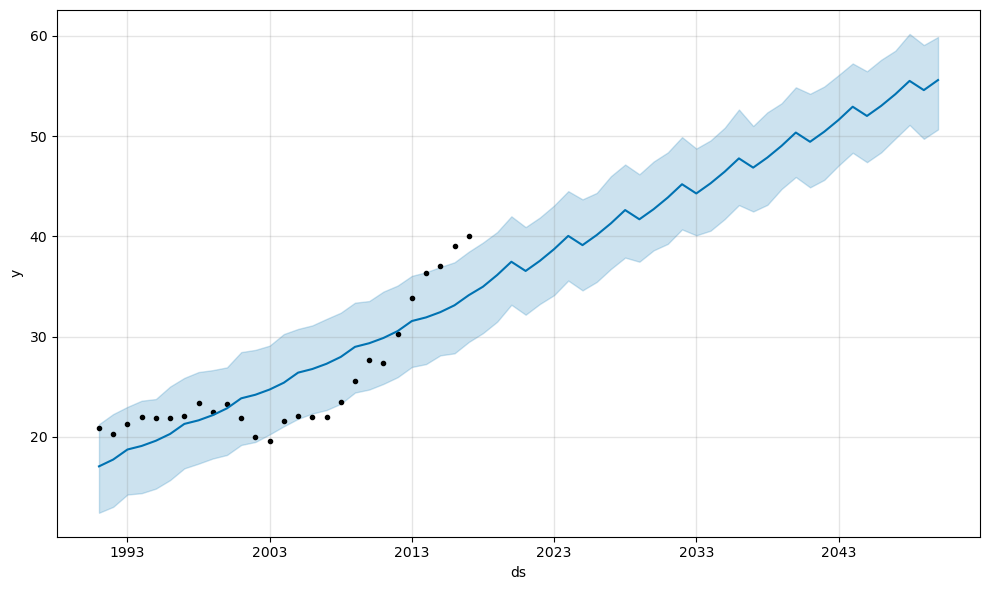

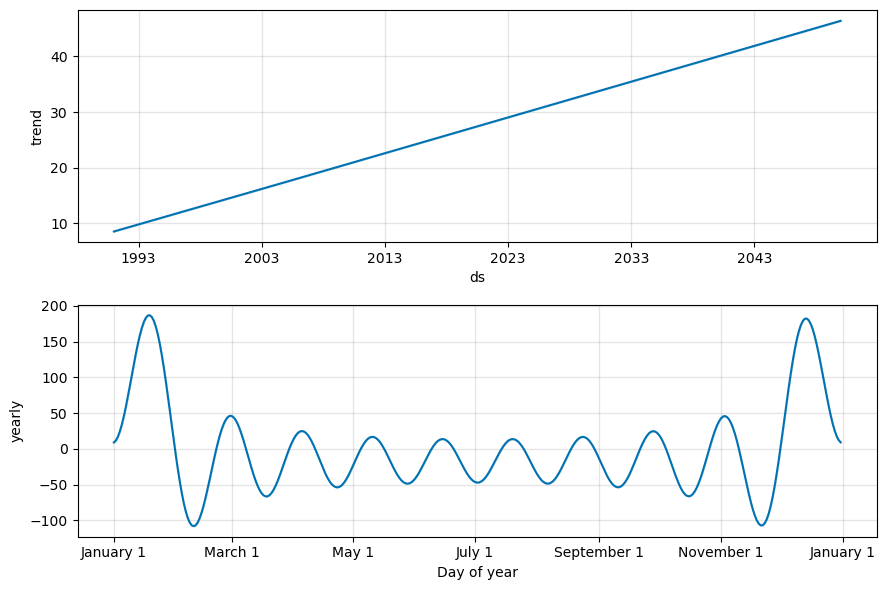

In [302]:
data_to_add_together=[]
data_to_be_drawn=pd.DataFrame(columns=['Year','Entity','Renewables - % electricity'])
for i in data['Entity'].unique():
    year=pd.DataFrame([[j] for j in range(1991,2051)],columns=["Year"])
    cou=pd.DataFrame([[i]]*60,columns=["Entity"])
    data_to_do=data[data['Entity']==i]
    data_to_use=data_to_do[["Year","Renewables - % electricity"]]
    data_to_use=data_to_use.rename(columns={'Year':"ds","Renewables - % electricity":"y"})
    data_to_use['ds']=pd.to_datetime(data_to_use['ds'].astype(int).astype(str)+'-01-01')
    model_re=Prophet()
    model_re.fit(data_to_use)
    future=model_re.make_future_dataframe(periods=33,freq="Y")
    forecast=model_re.predict(future)
    fig1=model_re.plot(forecast)
    fig2=model_re.plot_components(forecast)
    fig1.savefig("/Volumes/E/大学/新加坡南洋理工/南洋理工本科/第一年/第二学期/数据科学和人工智能导论/mini-project/renewable_energy_predic_rate"+i+"_.png")
    data_rene_pre=pd.DataFrame(forecast["yhat"])
    data_rene_pre.rename(columns={'yhat':'Renewables - % electricity'},inplace=True)
    data_to_be_add=pd.concat([year,cou,data_rene_pre],axis=1)
    data_to_add_together.append(data_to_be_add)
for i in data_to_add_together:
    data_to_be_drawn=pd.concat([data_to_be_drawn,i],axis=0,ignore_index=True)

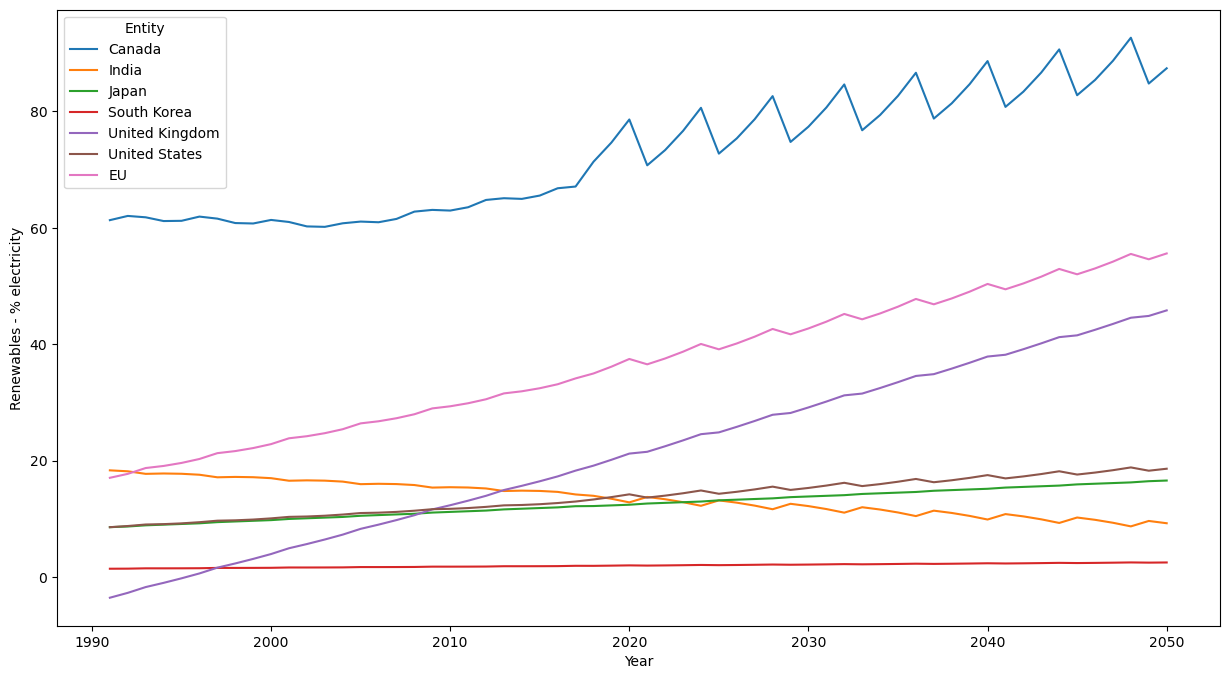

In [303]:
g = sns.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_to_be_drawn)
# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# We can see that if we directly use the time-series to predict the data, it turn out to be wrong because the data is very chaotic and is affected by many other factors
# The Time-Series model just ignore those complex feature and simply interpret the data as a "positive related", which is neither offering us any insight into the trend nor give any precious prediction.

# Model 3 use Neural Network to find the most effective factor

# we known that these factors both have an effect on the usage of renewable energy, and how can we find the factor that affect it most,which means human can put much more effort on that specific factor to prevent the climate change

# We will use these data to train a Neural Network, and try to check the gradients, which can give us insight into the partial defiiritial of each varible

# I plan to assess the impact of each input variable on the final outcome by calculating the partial derivatives of the neural network's output with respect to each input variable. 
# Specifically, I will employ automatic differentiation techniques to compute these partial derivatives. Then, I will evaluate the importance of each variable based on the absolute values of these derivatives. 
# This approach will help me identify the variables that have the most significant impact on the model's output.

In [2]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Entity    Year    Population  indu_rate  \
0    Canada  1991.0  2.801692e+07  21.981981   
1    Canada  1992.0  2.834399e+07  21.985537   
2    Canada  1993.0  2.867294e+07  21.879077   
3    Canada  1994.0  2.897873e+07  22.098869   
4    Canada  1995.0  2.928938e+07  22.210616   
..      ...     ...           ...        ...   
415      EU  2046.0  2.988869e+09  14.125226   
416      EU  2047.0  3.016004e+09  13.860916   
417      EU  2048.0  3.047225e+09  13.618415   
418      EU  2049.0  3.045592e+09  12.609690   
419      EU  2050.0  3.069535e+09  12.322810   

     Annual CO₂ emissions per GDP (kg per international-$)  
0                                         2.801692e+07      
1                                         2.834399e+07      
2                                         2.867294e+07      
3                                         2.897873e+07      
4                                         2.928938e+07      
..                                                 ...      
415                                       2.988869e+09      
416                                       3.016004e+09      
417                                       3.047225e+09      
418                                       3.045592e+09      
419                                       3.069535e+09      

[420 rows x 5 columns]

In [58]:
useful=['Entity','Year', 'Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'indu_rate',
       'Renewables - % electricity']
feature=['Year', 'Population',
       'Annual CO₂ emissions per GDP (kg per international-$)',
       'indu_rate']
data=pd.read_csv("/Users/catillzhang/Downloads/all_we_need.csv")
data_label=pd.DataFrame(data['Renewables - % electricity'])
data_to_train=pd.concat([data_feature,data_label],axis=1)
size=data_to_train.shape

(189, 12)